In [1]:
import pandas as pd

In [2]:
datasets = pd.read_csv('Party.csv')

In [3]:
datasets1 = pd.read_csv('Company.csv')

In [4]:
datasets.tail()

,Sr No.,Reference No (URN),Journal Date,Date of\nPurchase,Date of Expiry,Name of the Purchaser,Column7,Column8,Column9,Prefix,Bond\nNumber,Denominations,Issue Branch Code,Issue Teller,Status
18866,18867,1.202400e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,NaN,NaN,NaN,OC,15695,10000000,1,5898161,Paid
18867,18868,1.202400e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,NaN,NaN,NaN,OC,15693,10000000,1,5898161,Paid
18868,18869,1.202400e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,NaN,NaN,NaN,OC,15697,10000000,1,5898161,Paid
18869,18870,1.202400e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,NaN,NaN,NaN,OC,17803,10000000,1,5898161,Paid
18870,18871,1.202400e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,NaN,NaN,NaN,OC,15691,10000000,1,5898161,Paid


In [5]:
datasets1.tail()

,Sr No.,Date of\nEncashment,Name of the Political Party,Column4,Column5,Account no. of\nPolitical Party,Prefix,Bond\nNumber,Denominations,Pay Branch\nCode,Pay Teller
20416,20417,24-01-2024,JANASENA PARTY,NaN,NaN,*******3929,TL,2619,1000000,847,7620160
20417,20418,24-01-2024,JANASENA PARTY,NaN,NaN,*******3929,TL,2608,1000000,847,7620160
20418,20419,24-01-2024,JANASENA PARTY,NaN,NaN,*******3929,TL,2633,1000000,847,7620160
20419,20420,24-01-2024,JANASENA PARTY,NaN,NaN,*******3929,TL,2627,1000000,847,7620160
20420,20421,24-01-2024,JANASENA PARTY,NaN,NaN,*******3929,TL,2631,1000000,847,7620160


In [6]:
datasets = datasets.drop(['Column7', 'Column8', 'Column9', 'Sr No.'], axis=1)

In [7]:
datasets1 = datasets1.drop(['Column4', 'Column5', 'Sr No.'], axis=1)

In [8]:
result = pd.concat([datasets, datasets1], axis=1, join='inner')

In [9]:
datasets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Reference No (URN)     18871 non-null  float64
 1   Journal Date           18871 non-null  object 
 2   Date of
Purchase       18871 non-null  object 
 3   Date of Expiry         18871 non-null  object 
 4   Name of the Purchaser  18871 non-null  object 
 5   Prefix                 18871 non-null  object 
 6   Bond
Number            18871 non-null  int64  
 7   Denominations          18871 non-null  int64  
 8   Issue Branch Code      18871 non-null  int64  
 9   Issue Teller           18871 non-null  int64  
 10  Status                 18871 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 1.6+ MB


In [10]:
datasets1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20421 entries, 0 to 20420
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Date of
Encashment              20421 non-null  object
 1   Name of the Political Party     20421 non-null  object
 2   Account no. of
Political Party  20421 non-null  object
 3   Prefix                          20421 non-null  object
 4   Bond
Number                     20421 non-null  int64 
 5   Denominations                   20421 non-null  int64 
 6   Pay Branch
Code                 20421 non-null  int64 
 7   Pay Teller                      20421 non-null  int64 
dtypes: int64(4), object(4)
memory usage: 1.2+ MB


In [11]:
# datasets['Date of Expiry'] = datasets['Date of Expiry'].astype('datetime64[ns]')

In [12]:
# datasets1['Date of\nEncashment']=datasets1['Date of\nEncashment'].astype('datetime64[ns]')

In [13]:
# datasets['Journal Date']= datasets['Journal Date'].astype('datetime64[ns]')

In [14]:
# datasets['Date of\nPurchase']= datasets['Date of\nPurchase'].astype('datetime64[ns]')

In [15]:
def Company_Counter(df_company):
    company_name = df_company["Name of the Purchaser"]    
    company_name = company_name.drop_duplicates()
    comapanys = []
    company_name1 = []
    for i in company_name:
        comapanys.append(i)
        company_name1.append(i)
    counter = 0
    for i in company_name:
        temp=df_company[(df_company['Name of the Purchaser']==i)]
        company_name1[counter] = pd.DataFrame(temp)
        # print(company_name1[counter])
        counter = counter +1
        
        # print(company_name1[counter
    company_total_funds = []
    for i in company_name1:
        result = i['Denominations'].sum()
        company_total_funds.append(result)
        # print(result
    companys_funds = dict(zip(comapanys, company_total_funds))
    return companys_funds , company_name1 , comapanys , company_total_funds  


In [16]:
def Party_Counter(df_party):
    party_name = df_party["Name of the Political Party"]    
    party_name = party_name.drop_duplicates()
    parties = []
    party_name1 = []
    for i in party_name:
        parties.append(i)
        party_name1.append(i)
    counter = 0
    for i in party_name:
        temp=df_party[(df_party['Name of the Political Party']==i)]
        party_name1[counter] = pd.DataFrame(temp)
        # print(company_name1[counter])
        counter = counter +1
        
        # print(company_name1[counter
    parties_total_funds = []
    for i in party_name1:
        result1 = i['Denominations'].sum()
        result = result1/10000000
        parties_total_funds.append(result)
        # print(result
    party_funds = dict(zip(parties, parties_total_funds))
    return party_funds , party_name1 , parties , parties_total_funds  


In [17]:
Comany_Fund_Total , Company_Datasets_List , Company_Name_List , _, = Company_Counter(datasets)

In [18]:
Party_Total_Fund , Party_Datasets_List , Party_Name_List, _, = Party_Counter(datasets1)

In [19]:
Comany_Fund_Total

{'A B C INDIA LIMITED': 4000000,
 'ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED': 2500000,
 'ARIHANT ENTERPRISES': 4000000,
 'CHOUDHARY GARMENTS': 2000000,
 'ESSEL MINING AND INDS LTD': 2245000000,
 'GRASIM INDUSTRIES LTD': 330000000,
 'HIGHSTREET CRUISES AND ENTERTAINMENT PVT LTD': 3000000,
 'INNOCENT MERCHANDISE PVT LTD': 2500000,
 'KAMLANG SAW & VENEER MILLS PVT LTD': 2000000,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 8210000000,
 'MERLIN RECREATION PVT LTD': 2500000,
 'MSPL LTD': 40000000,
 'MYRIAD DEVELOPERS': 1500000,
 'OMKAR VENTURES PVT LTD': 40000000,
 'PATEL HIGHWAY MANAGEMENT PVT LTD': 10000000,
 'PHL FINIVEST PVT LTD': 400000000,
 'PIRAMAL CAPITAL AND HOUSING FINANCE LTD': 100000000,
 'PIRAMAL ENTERPRISES LTD': 100000000,
 'PONUGOTI HEMENDAR RAO': 300000,
 'RENUKA INVESTMENTS AND FINANCE LTD': 50000000,
 'RENUKESHWAR INVESTMENTS PVT LTD': 50000000,
 'SHIVAM TRANSCON PRIVATE LIMITED': 5000000,
 'SKYWORLD DEVELOPERS LLP': 1500000,
 'TEXPORT CREATION': 9000000,
 'AL

In [20]:
datasets1['Date']= datasets1["Date of\nEncashment"].astype(str)
datasets1['Day']=datasets1['Date'].str.split('-').str[0]
datasets1['Months']=datasets1['Date'].str.split('-').str[1]
datasets1['Year']= datasets1['Date'].str.split('-').str[2]
datasets1['Months']=datasets1['Months'].astype(int)
datasets1['Year']=datasets1['Year'].astype(int)
datasets1['Day']=datasets1['Day'].astype(int)

In [21]:
datasets['Date']= datasets["Date of\nPurchase"].astype(str)
datasets['Day']=datasets['Date'].str.split('-').str[0]
datasets['Months']=datasets['Date'].str.split('-').str[1]
datasets['Year']= datasets['Date'].str.split('-').str[2]
datasets['Months']=datasets['Months'].astype(int)
datasets['Year']=datasets['Year'].astype(int)
datasets['Day']=datasets['Day'].astype(int)

### Split Datasets in YearWish

In [22]:
years = [2019 , 2020, 2021, 2022, 2023, 2024]
Party_Year = [2019 , 2020, 2021, 2022, 2023, 2024]
Company_Year = [2019 , 2020, 2021, 2022, 2023, 2024]

In [23]:
Counter = 0
for i in years:
    print(i)
    temp = datasets1[(datasets1["Year"] == i)]
    Party_Year[Counter] = pd.DataFrame(temp)
    # print(company_name1[counter])
    Counter = Counter + 1

2019
2020
2021
2022
2023
2024


In [24]:
Counter = 0
for i in years:
    temp = datasets[(datasets["Year"] == i)]
    Company_Year[Counter] = pd.DataFrame(temp)
    # print(company_name1[counter])
    Counter = Counter + 1

In [25]:
Party_2019_Total , Party_2019_datasets , Party_2019_Name , _, = Party_Counter(Party_Year[0])

In [26]:
Party_2020_Total , Party_2020_datasets , Party_2020_Name , _, = Party_Counter(Party_Year[1])

In [27]:
Party_2021_Total , Party_2021_datasets , Party_2021_Name , _, = Party_Counter(Party_Year[2])

In [28]:
Party_2022_Total , Party_2022_datasets , Party_2022_Name , _, = Party_Counter(Party_Year[3])

In [29]:
Party_2023_Total , Party_2023_datasets , Party_2023_Name , _, = Party_Counter(Party_Year[4])

In [30]:
Party_2024_Total , Party_2024_datasets , Party_2024_Name , _, = Party_Counter(Party_Year[5])

In [31]:
Company_2019_Total , Company_2019_datasets , Company_2019_Name , _, = Company_Counter(Company_Year[0])

In [32]:
Company_2020_Total , Company_2020_datasets , Company_2020_Name , _, = Company_Counter(Company_Year[1])

In [33]:
Company_2021_Total , Company_2021_datasets , Company_2021_Name , _, = Company_Counter(Company_Year[2])

In [34]:
Company_2022_Total , Company_2022_datasets , Company_2022_Name , _, = Company_Counter(Company_Year[3])

In [35]:
Company_2023_Total , Company_2023_datasets , Company_2023_Name , _, = Company_Counter(Company_Year[4])

In [36]:
Company_2024_Total , Company_2024_datasets , Company_2024_Name , _, = Company_Counter(Company_Year[5])

In [37]:
Months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',' December']

In [38]:
def Monthly_Data(df_Year):
    Months = [ 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November',' December']
    Counter = 0
    for i in range(1 ,13):
        temp = df_Year[(df_Year['Months'] == i)]
        Months[Counter] = pd.DataFrame(temp)
        Counter= Counter+1
    return Months

In [39]:
parties = list(Party_Jan_2024_Total.keys())
denoation = list(Party_Jan_2024_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Jan 2024')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

NameError: name 'Party_Jan_2024_Total' is not defined

### Split Datasets in Monthly Datasets

In [40]:
Party_Monthly_2019 = Monthly_Data(Party_Year[0])

In [41]:
Party_Monthly_2020 = Monthly_Data(Party_Year[1])

In [42]:
Party_Monthly_2021 = Monthly_Data(Party_Year[2])

In [43]:
Party_Monthly_2022 = Monthly_Data(Party_Year[3])

In [44]:
Party_Monthly_2023= Monthly_Data(Party_Year[4])

In [45]:
Party_Monthly_2024 = Monthly_Data(Party_Year[5])

In [46]:
Party_April_2019_Total , Party_April_2019_Datasets , Party_April_2019_NameList, _, = Party_Counter(Party_Monthly_2019[3])

In [47]:
Party_May_2019_Total , Party_May_2019_Datasets , Party_May_2019_NameList, _, = Party_Counter(Party_Monthly_2019[4])

In [48]:
Party_July_2019_Total , Party_July_2019_Datasets , Party_July_2019_NameList, _, = Party_Counter(Party_Monthly_2019[6])

In [49]:
Party_Oct_2019_Total , Party_Oct_2019_Datasets , Party_Oct_2019_NameList, _, = Party_Counter(Party_Monthly_2019[9])

In [50]:
Party_Jan_2020_Total , Party_Jan_2020_Datasets , Party_Jan_2020_NameList, _, = Party_Counter(Party_Monthly_2020[0])

In [51]:
Party_Feb_2020_Total , Party_Feb_2020_Datasets , Party_Feb_2020_NameList, _, = Party_Counter(Party_Monthly_2020[1])

In [52]:
Party_Oct_2020_Total , Party_Oct_2020_Datasets , Party_Oct_2020_NameList, _, = Party_Counter(Party_Monthly_2020[9])

In [53]:
Party_Nov_2020_Total , Party_Nov_2020_Datasets , Party_Nov_2020_NameList, _, = Party_Counter(Party_Monthly_2020[10])

In [54]:
Party_Jan_2021_Total , Party_Jan_2021_Datasets , Party_Jan_2021_NameList, _, = Party_Counter(Party_Monthly_2021[0])

In [55]:
Party_April_2021_Total , Party_April_2021_Datasets , Party_April_2021_NameList, _, = Party_Counter(Party_Monthly_2021[3])

In [56]:
Party_July_2021_Total , Party_July_2021_Datasets , Party_July_2021_NameList, _, = Party_Counter(Party_Monthly_2021[6])

In [57]:
Party_Oct_2021_Total , Party_Oct_2021_Datasets , Party_Oct_2021_NameList, _, = Party_Counter(Party_Monthly_2021[9])

In [58]:
Party_Jan_2022_Total , Party_Jan_2022_Datasets , Party_Jan_2022_NameList, _, = Party_Counter(Party_Monthly_2022[0])

In [59]:
Party_April_2022_Total , Party_April_2022_Datasets , Party_April_2022_NameList, _, = Party_Counter(Party_Monthly_2022[3])

In [60]:
Party_Oct_2022_Total , Party_Oct_2022_Datasets , Party_Oct_2022_NameList, _, = Party_Counter(Party_Monthly_2022[9])

In [61]:
Party_Nov_2022_Total , Party_Nov_2022_Datasets , Party_Nov_2022_NameList, _, = Party_Counter(Party_Monthly_2022[10])

In [62]:
Party_Jan_2024_Total

NameError: name 'Party_Jan_2024_Total' is not defined

In [63]:
Party_Dec_2022_Total , Party_Dec_2022_Datasets , Party_Dec_2022_NameList, _, = Party_Counter(Party_Monthly_2022[11])

In [64]:
Party_Jan_2023_Total , Party_Jan_2023_Datasets , Party_Jan_2023_NameList, _, = Party_Counter(Party_Monthly_2023[0])

In [65]:
Party_Feb_2023_Total , Party_Feb_2023_Datasets , Party_Feb_2023_NameList, _, = Party_Counter(Party_Monthly_2023[1])

In [66]:
Party_April_2023_Total , Party_April_2023_Datasets , Party_April_2023_NameList, _, = Party_Counter(Party_Monthly_2023[3])

In [67]:
Party_July_2023_Total , Party_July_2023_Datasets , Party_July_2023_NameList, _, = Party_Counter(Party_Monthly_2023[6])

In [68]:
Party_Oct_2023_Total , Party_Oct_2023_Datasets , Party_Oct_2023_NameList, _, = Party_Counter(Party_Monthly_2023[9])

In [69]:
Party_Nov_2023_Total , Party_Nov_2023_Datasets , Party_Nov_2023_NameList, _, = Party_Counter(Party_Monthly_2023[10])

In [70]:
Party_Dec_2023_Total , Party_Dec_2023_Datasets , Party_Dec_2023_NameList, _, = Party_Counter(Party_Monthly_2023[11])

In [71]:
Party_Jan_2024_Total , Party_Jan_2024_Datasets , Party_Jan_2024_NameList, _, = Party_Counter(Party_Monthly_2024[0])

In [72]:
# result.to_csv('Marged_Data.csv')

In [73]:
result = pd.read_csv('Marged_Data.csv')

In [74]:
 df= result[(result['Issue Teller']==result['Pay Teller'])]

In [75]:
df

,Unnamed: 0,Reference No (URN),Journal Date,Date of\nPurchase,Date of Expiry,Name of the Purchaser,Prefix,Bond\nNumber,Denominations,Issue Branch Code,Issue Teller,Status,Date of\nEncashment,Name of the Political Party,Account no. of\nPolitical Party,Prefix1,Bond\nNumber1,Denominations1,Pay Branch\nCode,Pay Teller
279,279,6.910000e+20,15-04-2019,15-04-2019,29-04-2019,ALOK NARAYAN PANDEY,OC,5268,10000000,691,3300196,Paid,12-04-2019,BHARATIYA JANATA PARTY,*******8244,OC,6239,10000000,691,3300196
280,280,6.910000e+20,15-04-2019,15-04-2019,29-04-2019,ALOK NARAYAN PANDEY,OC,5266,10000000,691,3300196,Paid,12-04-2019,BHARATIYA JANATA PARTY,*******8244,OC,6234,10000000,691,3300196
281,281,6.910000e+20,15-04-2019,15-04-2019,29-04-2019,ALOK NARAYAN PANDEY,OC,5267,10000000,691,3300196,Paid,12-04-2019,BHARATIYA JANATA PARTY,*******8244,OC,6235,10000000,691,3300196
282,282,6.910000e+20,15-04-2019,15-04-2019,29-04-2019,ALOK NARAYAN PANDEY,TL,10931,1000000,691,3300196,Paid,12-04-2019,BHARATIYA JANATA PARTY,*******8244,OC,6244,10000000,691,3300196
283,283,6.910000e+20,15-04-2019,15-04-2019,29-04-2019,ALOK NARAYAN PANDEY,TL,10932,1000000,691,3300196,Paid,12-04-2019,BHARATIYA JANATA PARTY,*******8244,OC,4593,10000000,691,3300196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17494,17494,6.910000e+20,17-11-2023,17-11-2023,01-12-2023,JK LAKSHMI CEMENT LIMITED,TL,14933,1000000,691,8212066,Paid,16-10-2023,BHARATIYA JANATA PARTY,*******8244,OC,3553,10000000,691,8212066
17495,17495,6.910000e+20,17-11-2023,17-11-2023,01-12-2023,JK LAKSHMI CEMENT LIMITED,TL,14945,1000000,691,8212066,Paid,16-10-2023,BHARATIYA JANATA PARTY,*******8244,OC,13400,10000000,691,8212066
17496,17496,6.910000e+20,17-11-2023,17-11-2023,01-12-2023,JK LAKSHMI CEMENT LIMITED,TL,14949,1000000,691,8212066,Paid,16-10-2023,BHARATIYA JANATA PARTY,*******8244,OC,13334,10000000,691,8212066
17497,17497,6.910000e+20,17-11-2023,17-11-2023,01-12-2023,JK LAKSHMI CEMENT LIMITED,TL,14935,1000000,691,8212066,Paid,16-10-2023,BHARATIYA JANATA PARTY,*******8244,OC,13336,10000000,691,8212066


In [76]:
result

,Unnamed: 0,Reference No (URN),Journal Date,Date of\nPurchase,Date of Expiry,Name of the Purchaser,Prefix,Bond\nNumber,Denominations,Issue Branch Code,Issue Teller,Status,Date of\nEncashment,Name of the Political Party,Account no. of\nPolitical Party,Prefix1,Bond\nNumber1,Denominations1,Pay Branch\nCode,Pay Teller
0,0,1.200000e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11448,1000000,1,5899230,Paid,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,10000000,800,2770121
1,1,1.200000e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11447,1000000,1,5899230,Paid,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,10000000,800,2770121
2,2,1.200000e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11441,1000000,1,5899230,Paid,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3967,10000000,800,2770121
3,3,1.200000e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,OL,1113,100000,1,5899230,Paid,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,10418,1000000,800,2770121
4,4,1.200000e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,OL,1118,100000,1,5899230,Paid,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,126,1000000,800,2770121
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18866,18866,1.200000e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,OC,15695,10000000,1,5898161,Paid,20-11-2023,BHARATIYA JANATA PARTY,*******8244,OC,13311,10000000,691,7516991
18867,18867,1.200000e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,OC,15693,10000000,1,5898161,Paid,20-11-2023,BHARATIYA JANATA PARTY,*******8244,OC,13321,10000000,691,7516991
18868,18868,1.200000e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,OC,15697,10000000,1,5898161,Paid,20-11-2023,BHARATIYA JANATA PARTY,*******8244,OC,13307,10000000,691,7516991
18869,18869,1.200000e+18,11-01-2024,11-01-2024,25-01-2024,WESTWELL GASES PRIVATE LIMITED,OC,17803,10000000,1,5898161,Paid,20-11-2023,BHARATIYA JANATA PARTY,*******8244,OC,13346,10000000,691,7516991


In [77]:
df= result[(result['Bond\nNumber']==result['Bond\nNumber'])]

In [78]:
temp = Party_Year[5]  
temp["Months"].value_counts()

Months
1    872
Name: count, dtype: int64

In [79]:
Party_Year[0].head()

,Date of\nEncashment,Name of the Political Party,Account no. of\nPolitical Party,Prefix,Bond\nNumber,Denominations,Pay Branch\nCode,Pay Teller,Date,Day,Months,Year
0,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,10000000,800,2770121,12-04-2019,12,4,2019
1,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,10000000,800,2770121,12-04-2019,12,4,2019
2,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3967,10000000,800,2770121,12-04-2019,12,4,2019
3,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,10418,1000000,800,2770121,12-04-2019,12,4,2019
4,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,126,1000000,800,2770121,12-04-2019,12,4,2019


In [80]:
Company_Year[0].head()

,Reference No (URN),Journal Date,Date of\nPurchase,Date of Expiry,Name of the Purchaser,Prefix,Bond\nNumber,Denominations,Issue Branch Code,Issue Teller,Status,Date,Day,Months,Year
0,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11448,1000000,1,5899230,Paid,12-04-2019,12,4,2019
1,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11447,1000000,1,5899230,Paid,12-04-2019,12,4,2019
2,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11441,1000000,1,5899230,Paid,12-04-2019,12,4,2019
3,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,OL,1113,100000,1,5899230,Paid,12-04-2019,12,4,2019
4,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,OL,1118,100000,1,5899230,Paid,12-04-2019,12,4,2019


In [81]:
Party_Jan_2024_Total

{'TELUGU DESAM PARTY': 118.2,
 'ALL INDIA TRINAMOOL CONGRESS': 130.45,
 'BHARATIYA JANATA PARTY': 202.0,
 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE': 35.9,
 'SHIVSENA': 25.0,
 'JANASENA PARTY': 17.0,
 'SIKKIM DEMOCRATIC FRONT': 0.5,
 'SIKKIM KRANTIKARI MORCHA': 3.0,
 'YSR': 3.0,
 'RASHTRIYA JANTA DAL': 15.0,
 'DRAVIDA MUNNETRA KAZHAGAM (DMK)': 20.0}

In [82]:
Matched_data = pd.DataFrame(columns=['Date of\nPurchase','Name of the Purchaser','Bond\nNumber','Denominations','Name of the Political Party'])


In [83]:
# for i , j in datasets.iterrows():
#     for k , l in datasets1.iterrows():
#         if j['Bond\nNumber']==l["Bond\nNumber"]and j['Denominations']==l['Denominations']:
#             new_row = {
#                 'Date of\nPurchase' :j['Date of\nPurchase'],
#                 'Name of the Purchaser': j['Name of the Purchaser'],
#                 'Bond\nNumber' : j['Bond\nNumber'],
#                 'Denominations': j['Denominations'],
#                 'Name of the Political Party':l['Name of the Political Party']
#             }
#             print(new_row)
#             Matched_data._append(new_row , ignore_index=True)

In [84]:
Matched_data.to_csv('Matched_data.csv')

In [85]:
datasets.head()

,Reference No (URN),Journal Date,Date of\nPurchase,Date of Expiry,Name of the Purchaser,Prefix,Bond\nNumber,Denominations,Issue Branch Code,Issue Teller,Status,Date,Day,Months,Year
0,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11448,1000000,1,5899230,Paid,12-04-2019,12,4,2019
1,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11447,1000000,1,5899230,Paid,12-04-2019,12,4,2019
2,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,TL,11441,1000000,1,5899230,Paid,12-04-2019,12,4,2019
3,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,OL,1113,100000,1,5899230,Paid,12-04-2019,12,4,2019
4,1.201900e+18,12-04-2019,12-04-2019,26-04-2019,A B C INDIA LIMITED,OL,1118,100000,1,5899230,Paid,12-04-2019,12,4,2019


In [86]:
datasets1.head()

,Date of\nEncashment,Name of the Political Party,Account no. of\nPolitical Party,Prefix,Bond\nNumber,Denominations,Pay Branch\nCode,Pay Teller,Date,Day,Months,Year
0,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,775,10000000,800,2770121,12-04-2019,12,4,2019
1,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3975,10000000,800,2770121,12-04-2019,12,4,2019
2,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,OC,3967,10000000,800,2770121,12-04-2019,12,4,2019
3,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,10418,1000000,800,2770121,12-04-2019,12,4,2019
4,12-04-2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,*******5199,TL,126,1000000,800,2770121,12-04-2019,12,4,2019


In [87]:
Matched_data

,Date of\nPurchase,Name of the Purchaser,Bond\nNumber,Denominations,Name of the Political Party


In [88]:
# Matched = pd.read_csv('M.csv')

In [89]:
Matched = pd.read_csv('df.csv')

In [90]:
df = Matched.copy()

In [102]:
df1 = df[(df['Name of the Purchaser']=='AISHWARYA BUSINESS CORPORATION PVT')]

In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18741 entries, 0 to 18740
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   18741 non-null  int64 
 1   Date of
Purchase             18741 non-null  object
 2   Name of the Purchaser        18741 non-null  object
 3   Bond
Number                  18741 non-null  int64 
 4   Denominations                18741 non-null  int64 
 5   Name of the Political Party  18741 non-null  object
dtypes: int64(3), object(3)
memory usage: 878.6+ KB


In [104]:
Marged_Total , Marged_Datasets , Marged_Party_Name , _, = Party_Counter(df)

In [105]:
Marged_Datasets[0]

,Unnamed: 0,Date of\nPurchase,Name of the Purchaser,Bond\nNumber,Denominations,Name of the Political Party
0,0,12-04-2019,A B C INDIA LIMITED,11448,1000000,BHARATIYA JANATA PARTY
1,1,12-04-2019,A B C INDIA LIMITED,11447,1000000,BHARATIYA JANATA PARTY
2,2,12-04-2019,A B C INDIA LIMITED,11441,1000000,BHARATIYA JANATA PARTY
3,3,12-04-2019,A B C INDIA LIMITED,1113,100000,BHARATIYA JANATA PARTY
4,4,12-04-2019,A B C INDIA LIMITED,1118,100000,BHARATIYA JANATA PARTY
...,...,...,...,...,...,...
18610,18610,11-01-2024,RUNGTA SONS P LTD,15763,10000000,BHARATIYA JANATA PARTY
18611,18611,11-01-2024,RUNGTA SONS P LTD,16480,10000000,BHARATIYA JANATA PARTY
18612,18612,11-01-2024,RUNGTA SONS P LTD,15777,10000000,BHARATIYA JANATA PARTY
18613,18613,11-01-2024,RUNGTA SONS P LTD,17819,10000000,BHARATIYA JANATA PARTY


In [106]:
Marged_Total

{'BHARATIYA JANATA PARTY': 5594.2011,
 'ALL INDIA TRINAMOOL CONGRESS': 1592.5214,
 'PRESIDENT, ALL INDIA CONGRESS COMMITTEE': 1351.0945,
 'SHIVSENA': 152.4514,
 'SHIROMANI AKALI DAL': 7.26,
 'DRAVIDA MUNNETRA KAZHAGAM (DMK)': 632.0,
 'RASHTRIYA JANTA DAL': 72.5,
 'JAMMU AND KASHMIR NATIONAL CONFERENCE': 0.5,
 'BIHAR PRADESH JANTA DAL(UNITED)': 12.0,
 'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH': 28.5,
 'ADYAKSHA SAMAJVADI PARTY': 13.21,
 'AAM AADMI PARTY': 65.25,
 'BHARAT RASHTRA SAMITHI': 1191.1599,
 'BIJU JANATA DAL': 775.5,
 'YSR': 325.75,
 'TELUGU DESAM PARTY': 211.58,
 'GOA FORWARD PARTY': 0.35,
 'MAHARASHTRAWADI GOMNTAK PARTY': 0.55,
 'SIKKIM KRANTIKARI MORCHA': 36.5,
 'JANASENA PARTY': 21.0,
 'YSR CONGRESS PARTY': 3.0,
 'JHARKHAND MUKTI MORCHA': 12.5,
 'JANATA DAL ( SECULAR )': 41.0,
 'SIKKIM DEMOCRATIC FRONT': 5.5}

In [107]:
df1

,Unnamed: 0,Date of\nPurchase,Name of the Purchaser,Bond\nNumber,Denominations,Name of the Political Party


In [108]:
def Company_Counter1(df_company):
    company_name = df_company["Name of the Purchaser"]    
    company_name = company_name.drop_duplicates()
    comapanys = []
    company_name1 = []
    for i in company_name:
        comapanys.append(i)
        company_name1.append(i)
    counter = 0
    for i in company_name:
        temp=df_company[(df_company['Name of the Purchaser']==i)]
        company_name1[counter] = pd.DataFrame(temp)
        # print(company_name1[counter])
        counter = counter +1
        
        # print(company_name1[counter
    company_total_funds = []
    for i in company_name1:
        result1 = i['Denominations'].sum()
        result = result1/10000000
        company_total_funds.append(result)
        # print(result
    companys_funds = dict(zip(comapanys, company_total_funds))
    return companys_funds , company_name1 , comapanys , company_total_funds  


In [133]:
BJP_Comapny_Total ,BJP_Company_Datasets , BJP_Company_Name , _, = Company_Counter1(Marged_Datasets[0])

In [134]:
AITC_Comapny_Total ,AITC_Company_Datasets , AITC_Company_Name , _, = Company_Counter1(Marged_Datasets[1])

In [135]:
Congress_Comapny_Total ,Congress_Company_Datasets , Congress_Company_Name , _, = Company_Counter1(Marged_Datasets[2])

In [136]:
SS_Comapny_Total ,SS_Company_Datasets , SS_Company_Name , _, = Company_Counter1(Marged_Datasets[3])

In [137]:
SAD_Comapny_Total ,SAD_Company_Datasets , SAD_Company_Name , _, = Company_Counter1(Marged_Datasets[4])

In [138]:
DMK_Comapny_Total ,DMK_Company_Datasets , DMK_Company_Name , _, = Company_Counter1(Marged_Datasets[5])

In [139]:
RJD_Comapny_Total ,RJD_Company_Datasets , RJD_Company_Name , _, = Company_Counter1(Marged_Datasets[6])

In [140]:
JKNC_Comapny_Total ,JKNC_Company_Datasets , JKNC_Company_Name , _, = Company_Counter1(Marged_Datasets[7])

In [141]:
BPJD_Comapny_Total ,BPJD_Company_Datasets , BPJD_Company_Name , _, = Company_Counter1(Marged_Datasets[8])

In [142]:
NCPMP_Comapny_Total ,NCPMP_Company_Datasets , NCPMP_Company_Name , _, = Company_Counter1(Marged_Datasets[9])

In [143]:
ASP_Comapny_Total ,ASP_Company_Datasets , ASP_Company_Name , _, = Company_Counter1(Marged_Datasets[10])

In [144]:
AAP_Comapny_Total ,AAP_Company_Datasets , AAP_Company_Name , _, = Company_Counter1(Marged_Datasets[11])

In [145]:
BRS_Comapny_Total ,BRS_Company_Datasets , BRS_Company_Name , _, = Company_Counter1(Marged_Datasets[12])

In [146]:
BJD_Comapny_Total ,BJD_Company_Datasets , BJD_Company_Name , _, = Company_Counter1(Marged_Datasets[13])

In [147]:
YSR_Comapny_Total ,YSR_Company_Datasets , YSR_Company_Name , _, = Company_Counter1(Marged_Datasets[14])

In [148]:
TDP_Comapny_Total ,TDP_Company_Datasets , TDP_Company_Name , _, = Company_Counter1(Marged_Datasets[15])

In [149]:
GFD_Comapny_Total ,GFP_Company_Datasets , GFP_Company_Name , _, = Company_Counter1(Marged_Datasets[16])

In [150]:
MGP_Comapny_Total ,MGP_Company_Datasets , MGP_Company_Name , _, = Company_Counter1(Marged_Datasets[17])

In [151]:
SKM_Comapny_Total ,SKM_Company_Datasets , SKM_Company_Name , _, = Company_Counter1(Marged_Datasets[18])

In [152]:
JP_Comapny_Total ,JP_Company_Datasets , JP_Company_Name , _, = Company_Counter1(Marged_Datasets[19])

In [153]:
YCP_Comapny_Total ,YCP_Company_Datasets , YCP_Company_Name , _, = Company_Counter1(Marged_Datasets[20])

In [154]:
JMM_Comapny_Total ,JMM_Company_Datasets , JMM_Company_Name , _, = Company_Counter1(Marged_Datasets[21])

In [155]:
JD_Comapny_Total ,JD_Company_Datasets , JD_Company_Name , _, = Company_Counter1(Marged_Datasets[22])

In [157]:
SDF_Comapny_Total ,SDF_Company_Datasets , SDF_Company_Name , _, = Company_Counter1(Marged_Datasets[23])

In [158]:
SDF_Comapny_Total

{'FUTURE GAMING AND HOTEL SERVICES PR': 5.0,
 'TORRENT PHARMACEUTICALS LTD': 0.5}

In [159]:
JD_Comapny_Total

{'ILABS HYD TECHNOLOGY CENTRE PVT LTD': 5.0,
 'KCR ENTERPRISE LLP': 5.0,
 'KIRAN MAZUMDAR SHAW': 1.0,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 5.0,
 'RITHWIK PROJECTS PRIVATE LIMITED': 10.0,
 'NARA CONSTRUCTIONS': 10.0,
 'NIMBHA BIOTECH PRIVATE LIMITED': 2.0,
 'SIGMA ADVANCED SYSTEMS PRIVATE LIMI': 3.0}

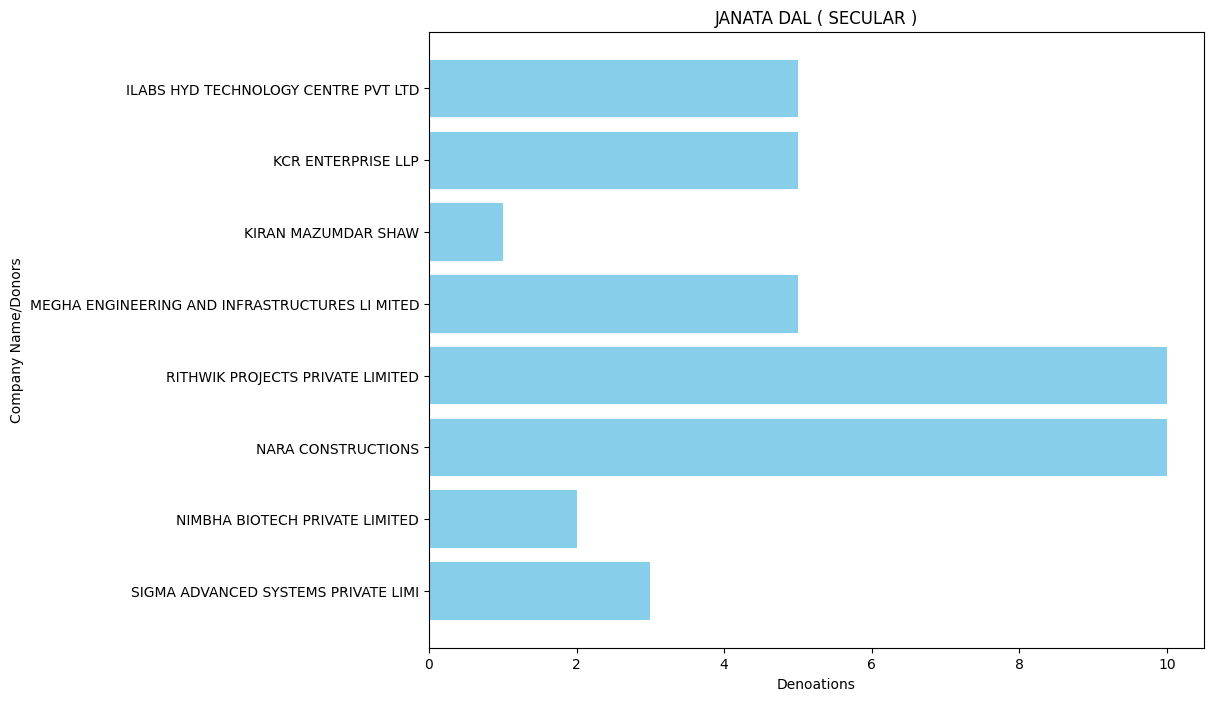

In [249]:
parties = list(JD_Comapny_Total.keys())
denoation = list(JD_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('JANATA DAL ( SECULAR )')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [160]:
JMM_Comapny_Total

{'SHREE CHAND SARAOGI': 0.75,
 'RITESH PROJECTS PVT LTD': 0.25,
 'MKJ ENTERPRISES LIMITED': 1.0,
 'VEDANTA LIMITED': 5.0,
 'PUJA COAL PRIVATE LIMITED': 2.0,
 'THRIVENI SAINIK MINING PRIVATE LIMI': 3.0,
 'DINESHCHANDRA R AGRAWAL INFRACON PVT LTD': 0.5}

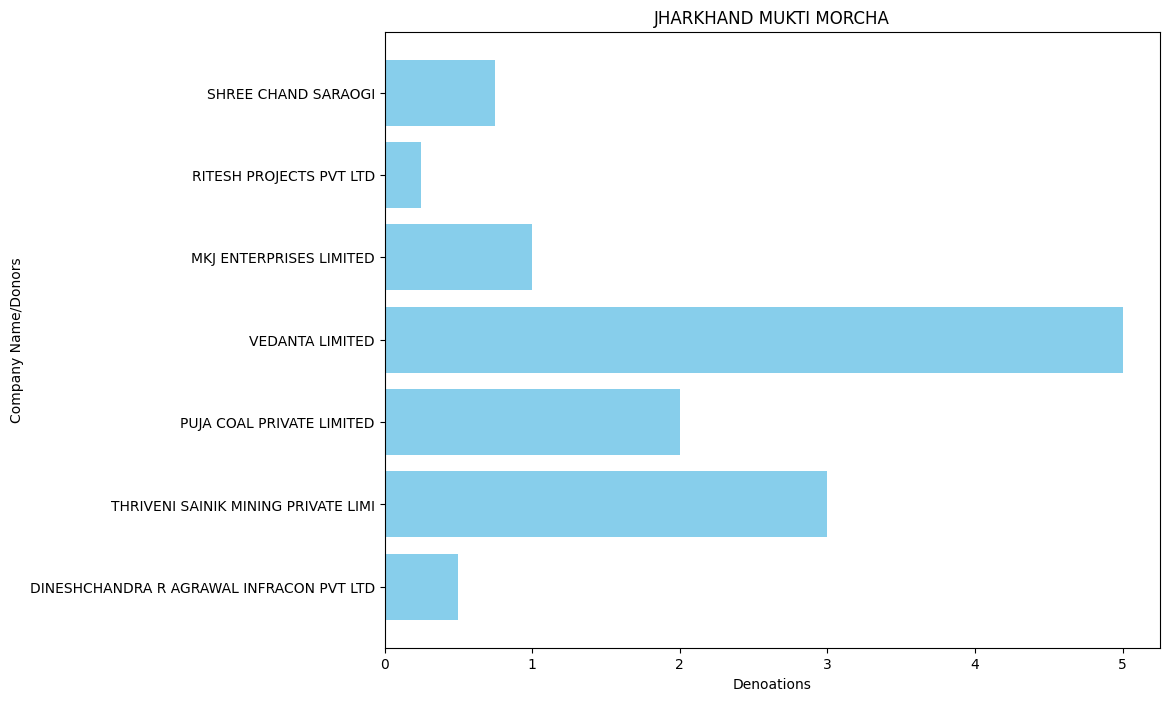

In [248]:
parties = list(JMM_Comapny_Total.keys())
denoation = list(JMM_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('JHARKHAND MUKTI MORCHA')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [161]:
YCP_Comapny_Total

{'YASHODA SUPER SPECIALITY HOSPITAL': 1.0,
 'THE RAMCO CEMENTS LIMITED': 1.0,
 'AARISH SOLAR POWER PRIVATE LIMITED': 1.0}

In [162]:
JP_Comapny_Total

{'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 4.0,
 'NATCO PHARMA LTD': 5.0,
 'VALLURUPALLI PRABHU KISHORE': 1.0,
 'SRI CHAITANYA STUDENTS FACILITY MANAGEME': 1.0,
 'WESTERN UP POWER TRANSMISSION COMPANY LI MITED': 10.0}

In [163]:
SKM_Comapny_Total

{'FUTURE GAMING AND HOTEL SERVICES PR': 8.0,
 'IPCA LABORATORIES LIMITED': 3.5,
 'ZYDUS HEALTHCARE LIMITED': 8.0,
 'FUTURE GAMING AND HOTEL SERVICES PVT LTD': 3.0,
 'MICRO LABS LIMITED': 7.0,
 'TORRENT PHARMACEUTICALS LTD': 7.0}

In [164]:
MGP_Comapny_Total

{'V M SALGAOCAR CORPORATION PVT LTD': 0.35, 'SHRINIVAS VASUDEVA DEMPO': 0.2}

In [165]:
GFD_Comapny_Total

{'V M SALGAOCAR CORPORATION PVT LTD': 0.15, 'GOA CARBON LTD': 0.2}

In [166]:
TDP_Comapny_Total

{'AUROBINDO PHARMA LIMITED': 2.5,
 'NATCO PHARMA LTD': 14.0,
 'DR REDDYS LABORATORIES LIMITED': 3.0,
 'TRIDENTCHEMPHARLIMITED': 5.0,
 'THE RAMCO CEMENTS LIMITED': 5.0,
 'AMARAVATI TEKSYSTEMS PRIVATE LIMITE': 2.0,
 'TEKREANT INDIA PRIVATE LIMITED': 2.0,
 'SLICK SOFTWARE SOLUTIONS PRIVATE LI': 1.0,
 'SREE RAYALASEEMA HI STRENGTH HYPO LTD': 1.0,
 'EFICENS SOFTWARE SERVICES PVT LTD': 2.0,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 28.0,
 'RITHWIK PROJECTS PRIVATE LIMITED': 5.0,
 'KIRITI VENTURES PRIVATE LIMITED': 2.0,
 'C R ASSOCIATES': 5.0,
 'MAATHA PROJECTS LLP': 5.0,
 'N A R INFRA PRIVATE LIMITED': 5.0,
 'SUDHAKAR KANCHARLA': 5.0,
 'SAGAR CEMENTS LIMITED': 0.5,
 'BYRAPANENI SHIVARJUN RAO': 0.25,
 'SLRV HOMES LLP': 2.0,
 'R K INFRACORP PRIVATE LIMITED': 0.88,
 'PRIMUSGLOBALTECHNOLOGIESPVTLTD': 0.45,
 'SRI SIDDHARTH INFRATECH & SERVICES(I) PVT LTD': 0.9,
 'SRI SIDDHARTH INFRATECH AND SERVICES I P': 0.1,
 'AIC VMR PROJECTS PVT LTD': 2.0,
 'SEPC POWER PVT LTD OPERATION RETEN': 5.0,


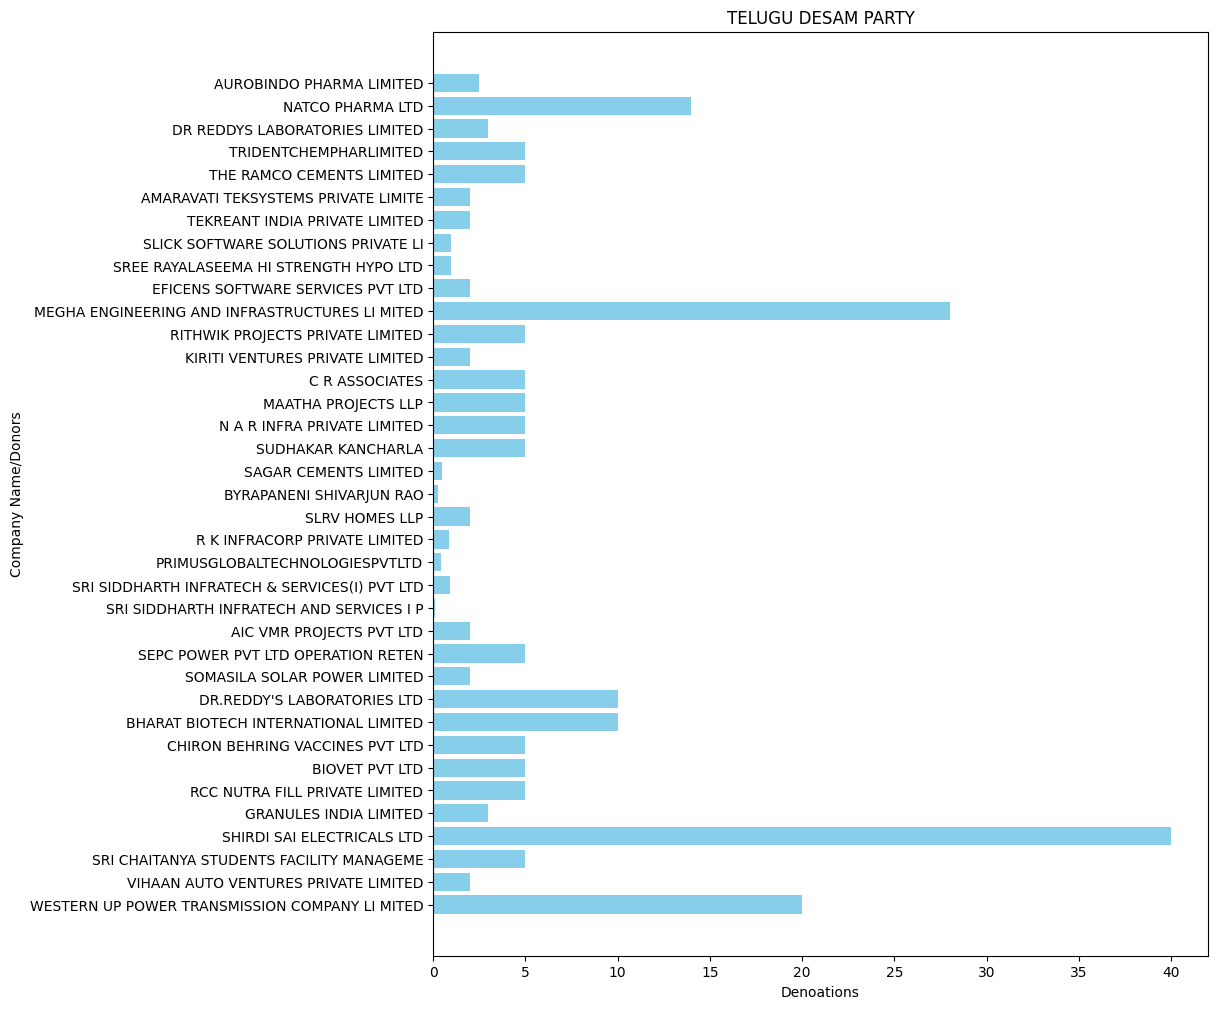

In [243]:
parties = list(TDP_Comapny_Total.keys())
denoation = list(TDP_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 12))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('TELUGU DESAM PARTY')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [167]:
YSR_Comapny_Total

{'FUTURE GAMING AND HOTEL SERVICES PR': 154.0,
 'PRAKASH DISTILLERY & CHEMICAL CO (P) LT D': 0.12,
 'RAMESH AGARWAL C S BOTTLING PLANT': 0.72,
 'SAROJIT KUMAR DEY': 0.5,
 'HIMALAYAN ENDEAVOUR PVT LTD': 1.4,
 'LAXMI INDUSTRIAL BOTTLING PLAN': 0.71,
 'MONALISA BOTTLING INDUSTRIES PVT LTD': 0.5,
 'SENGUPTA AND SENGUPTA PRIVATE LIMIT': 1.4,
 'TRANSWAYS EXIM PRIVATE LTD': 0.6,
 'VARAS INTERNATIONAL PRIVATE LIMITED': 0.3,
 'ACHINTYA SOLAR POWER PVT LTD': 1.0,
 'DIVYESH POWER PVT LTD': 2.0,
 'ELENA RENEWABLE ENERGY PVT LTD': 2.0,
 'SEI DIAMOND PVT LTD': 2.0,
 'TANOT WIND POWER VENTURES PVT LTD': 3.0,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 37.0,
 'JYOTSNA AGGARWAL': 0.25,
 'KHUSHBU AGGARWAL': 0.25,
 'PREM AGGARWAL': 0.25,
 'PREM AGGARWAL AND SONS HUF': 0.25,
 'SANDEEP AGGARWAL': 0.25,
 'SANDEEP AGGARWAL AND SONS HUF': 0.25,
 'USHA AGGARWAL': 0.25,
 'VEDANTA ELECTRICALS PRIVATE LIMITED': 1.75,
 'VIPIN AGGARWAL': 0.25,
 'VIPIN AGGARWAL AND SONS HUF': 0.25,
 'THE RAMCO CEMENTS LIMITED

In [168]:
BJD_Comapny_Total

{'KAYPEE ENTERPRISES': 10.0,
 'MS S N MOHANTY': 45.0,
 'PENGUIN TRADING & AGENCIES LIMITED': 27.5,
 'ESSEL MINING AND INDS LTD': 174.5,
 'ULTRATECHCEMENTSLTD': 10.0,
 'GRASIM INDUSTRIES LTD': 10.0,
 'UTKAL ALUMINA INTERNATIONAL LTD': 10.0,
 'ARDENT STEEL LIMITED': 4.0,
 'RUNGTA SONS P LTD': 50.0,
 'SHRI JAGANNATH STEELS & POWER LTD': 14.0,
 'ORISSA METALIKS PVT LIMITED': 10.0,
 'PROCURE ADVISORY SERVICES PRIVATE LTD': 8.0,
 'RASHMI CEMENT LTD': 45.0,
 'RASHMI METALIKS LTD': 27.0,
 'ROSHNI DEALMARK PRIVATE LTD': 5.0,
 'KAMNA CREDITS AND PROMOTORS PVT LTD': 5.0,
 'NIRMAL KUMAR BATHWAL': 2.0,
 'ORRISA METALIKS PVT LTD': 8.0,
 'PENGUIN TRADING AND AGENCIES LTD': 3.0,
 'AVEES TRADING AND FINANCE PVT LTD': 3.0,
 'JINDAL STAINLESS LTD': 30.0,
 'VEDANTA LIMITED': 40.0,
 'PRB SECURITIES PVT LTD': 1.5,
 'DIVIT SECURITY': 0.5,
 'IFB AGRO INDUSTRIES LIMITED': 6.3,
 'PROCURE ADVISORY SERVICES PRIVATE L': 1.0,
 'ROSHNI DEALMARK PRIVATE LIMITED': 1.0,
 'ABHINANDANSTOCKBROKINGPVTLTD': 1.2,
 'BENGAL VI

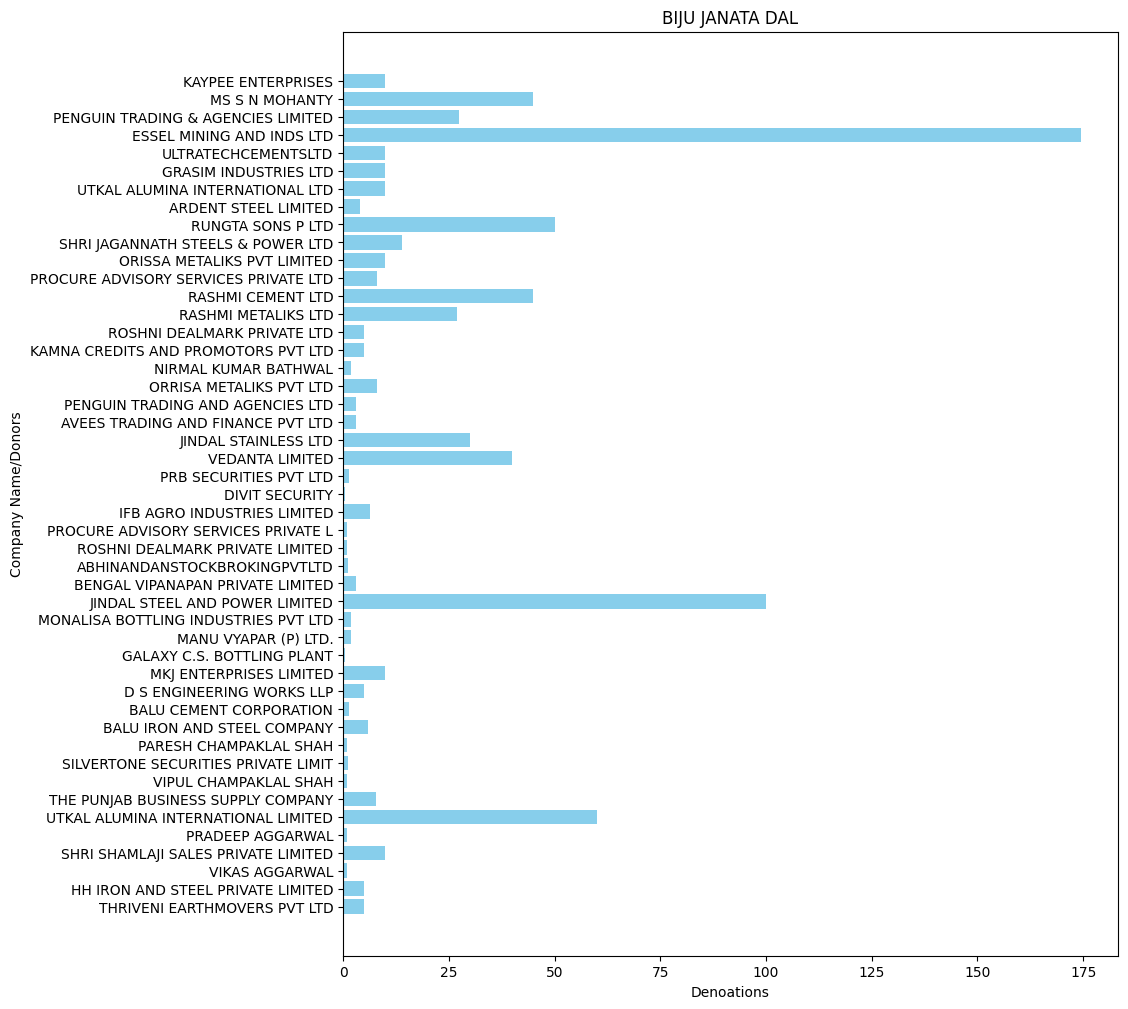

In [241]:
parties = list(BJD_Comapny_Total.keys())
denoation = list(BJD_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 12))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('BIJU JANATA DAL')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [169]:
BRS_Comapny_Total

{"DR.REDDY'S LABORATORIES LTD": 32.0,
 'ITC LIMITED': 1.6029,
 'MYTRAH ENERGY(INDIA) PRIVATE LIMITED': 5.0,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 150.0,
 'ANBEE CONSTRUCTIONS LLP': 2.0,
 'CAPE TRADING LLP': 2.0,
 'CAPSTAN TRADING LLP': 2.0,
 'CASA MARIA PROPERTIES LLP': 2.0,
 'K RAHEJA CORP PVT LTD': 18.0,
 'PALM SHELTER ESTATE DEVELOPMENT LL': 2.0,
 'RAGHUKOOL ESTATE DEVELOPMENT LLP': 2.0,
 'YASHODA SUPER SPECIALITY HOSPITAL': 94.0,
 'BIGC MOBILES PVT LTD': 2.5,
 'R.S.BROTHERS RETAIL INDIA PRIVATE LIMITE D': 2.5,
 'SANDHYA CONSTRUCTIONS & ESTATES PRIVATE LIMITED': 13.0,
 'GORUKANTI DEVENDER RAO': 1.0,
 'GORUKANTI SURENDER RAO': 1.0,
 'LAKSHMI MEDICALS': 2.0,
 'RAJAPUSHPA ASSET MANAGEMENT LLP': 5.0,
 'RAJAPUSHPA PROPERTIES PVT LTD': 20.0,
 'RAVENDER RAO GORUKANTI': 1.0,
 'BORAVELLI BHUPAL REDDY': 1.0,
 'BORAVELLI RAMULAMMA': 1.0,
 'DHEERAJ MEDICALS': 15.0,
 'HETERO DRUGS LIMITED': 30.0,
 'HETERO LABS LIMITED': 20.0,
 'HONOUR LAB LTD': 20.0,
 'KOYA AND COMPANY CONSTRUCTION 

In [170]:
AAP_Comapny_Total

{'TORRENT PHARMACEUTICALS LIMITED': 1.0,
 'BG SHIRKE CONSTRUCTION TECHNOLOGY PVT LTD': 1.0,
 'LEPTON SOFTWARE EXPORT AND RESEARCH PRIVATE LTD': 0.1,
 'KRBL LTD': 0.2,
 'BAJAJ AUTO LTD': 8.0,
 'TECH MAHINDRA LTD': 1.0,
 'SPICEJET LIMITED': 0.65,
 'RAMAN SHARMA': 0.2,
 'TORRENT POWER LTD': 2.0,
 'V M SALGAOCAR CORPORATION PVT LTD': 0.3,
 'DIWAKAR NIGAM': 0.25,
 'MOTOWN TRADING PVT LTD': 0.15,
 'DEMPO IND PVT LTD NAVHIND PAPERSAND PUB': 0.05,
 'DEVASHRI NIRMAN LLP': 0.05,
 'GOA CARBON LTD': 0.1,
 'VARDHMAN TEXTILES LTD': 0.5,
 'TRANSWAYS EXIM PRIVATE LIMITED': 7.0,
 'ANAND SAKHARAM PIMPARKAR': 0.1,
 'DR. MANDEEP SHARMA': 0.1,
 'MR ANUJ GOENKA': 0.1,
 'MR. BAL KISHAN GOENKA': 0.1,
 'MRS. SUSHILA GOENKA': 0.1,
 'MS. SHIPRA GOENKA': 0.1,
 'S K SUPPLY CHAIN SOLUTIONS': 0.1,
 'S K TRADERS': 0.1,
 'S K TRADING CO.': 0.1,
 'SAN BEVERAGES PVT LTD': 0.3,
 'SAN LOGISTICS': 0.3,
 'SANJAY KUMAR': 0.15,
 'VINAY KUMAR BHATT': 0.15,
 'AAYTEE LOGISTICS PRIVATE LIMITED': 0.3,
 'ABHISHEK KAUSHIK': 0.1,
 'A

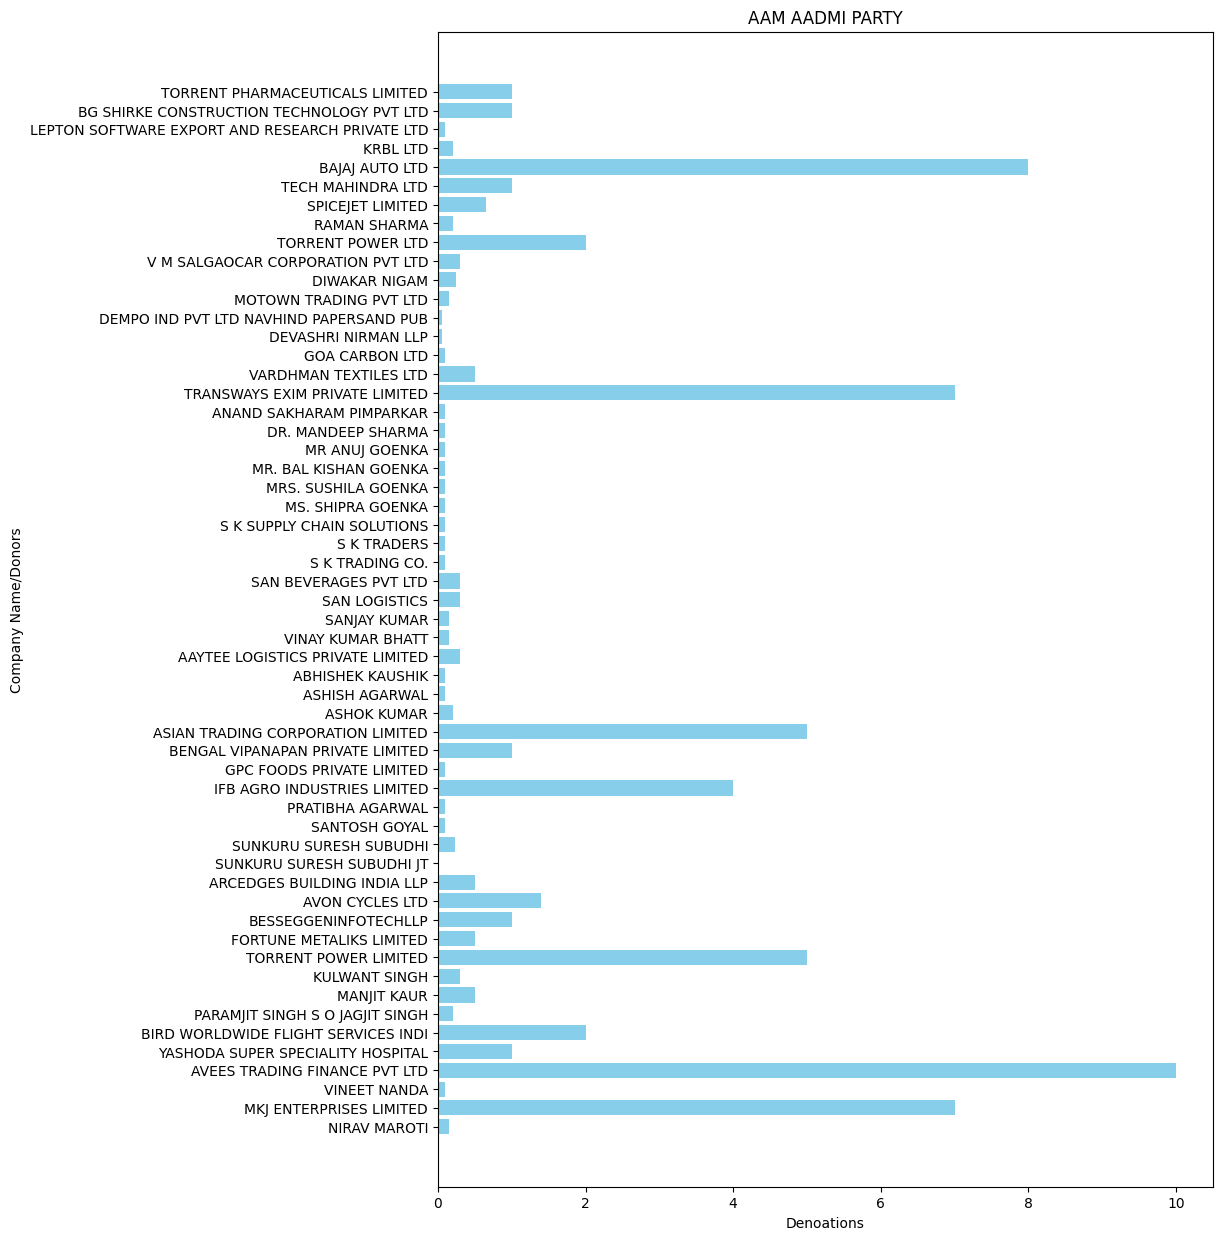

In [235]:
parties = list(AAP_Comapny_Total.keys())
denoation = list(AAP_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 15))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('AAM AADMI PARTY')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [171]:
ASP_Comapny_Total

{'KEVENTER FOODPARK INFRA LIMITED': 10.0,
 'M S JUGENDRA SINGH AND COMPANY': 0.21,
 'TORRENT PHARMACEUTICALS LTD': 3.0}

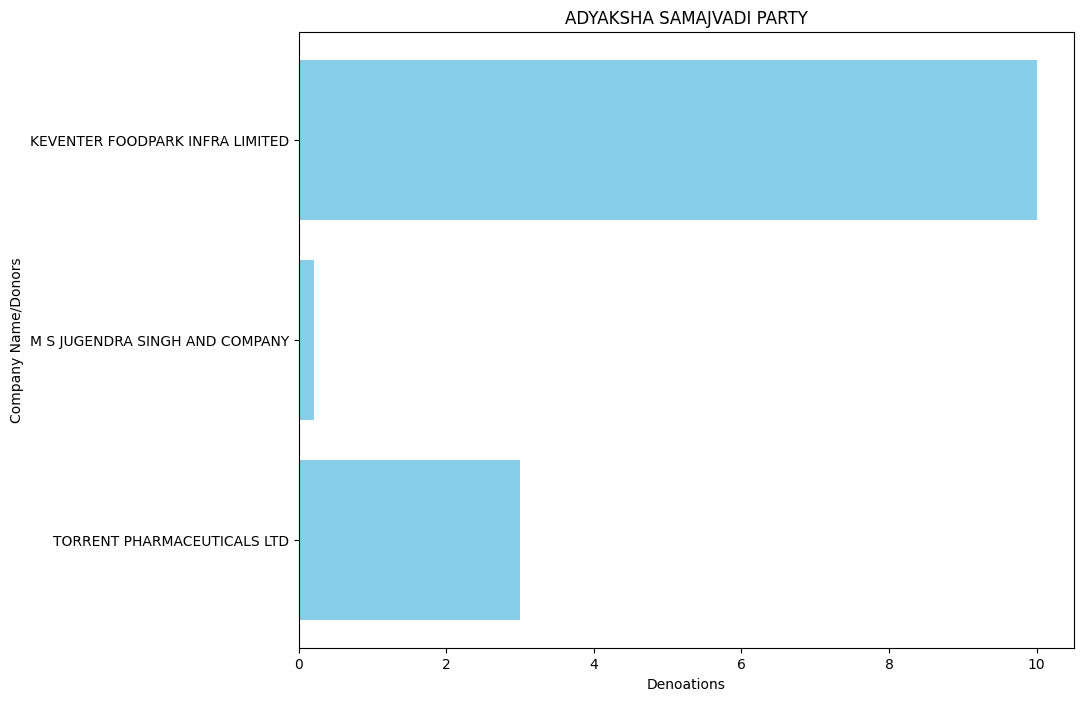

In [229]:
parties = list(ASP_Comapny_Total.keys())
denoation = list(ASP_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('ADYAKSHA SAMAJVADI PARTY')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [172]:
NCPMP_Comapny_Total

{'AMBUJA HOUSING AND URBAN INFRASTRUCTURE CO. LTD.': 1.0,
 'TORRENT POWER LIMITED': 3.5,
 'AMBUJA REALTY EVENTS MANAGMENT LTD': 0.5,
 'CHANDA INVESTMENT TRADING CO. PVT': 0.5,
 'CYZACHEM PVT LTD': 0.75,
 'MAGARPATTA TOWNSHIP DEV AND CONST C': 3.0,
 'NANDED CITY DEVELOPMENT AND CONSTRU': 2.0,
 'SEZ BIOTECH SERVICES PVT LTD': 0.75,
 'MAHALAXMI VIDYUT PVT.LTD.': 2.5,
 'RAHUL BHATIA': 3.8,
 'V M SALGAOCAR CORPORATION PVT LTD': 0.1,
 'GOA CARBON LTD': 0.1,
 'QWIKSUPPLYCHAINPRIVATELIMITED': 10.0}

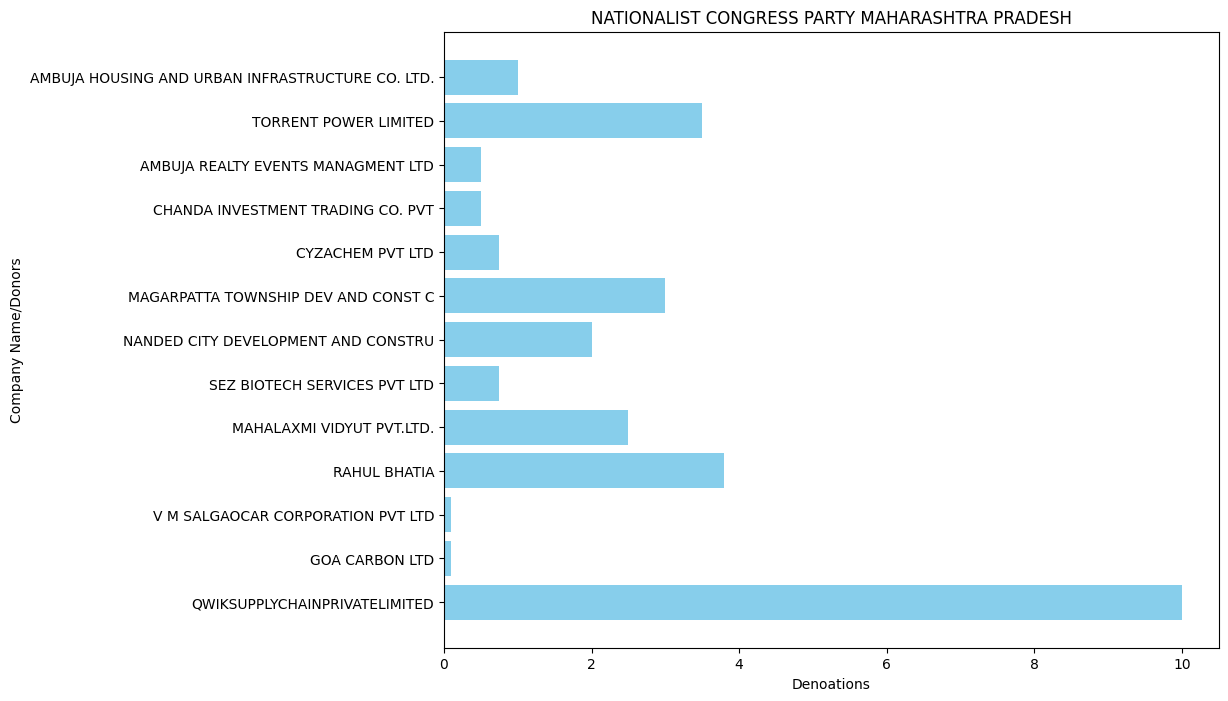

In [228]:
parties = list(NCPMP_Comapny_Total.keys())
denoation = list(NCPMP_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [173]:
BPJD_Comapny_Total

{'BHARTI INFRATEL LIMITED': 1.0,
 'SHREE CEMENT LTD': 1.0,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LTD': 10.0}

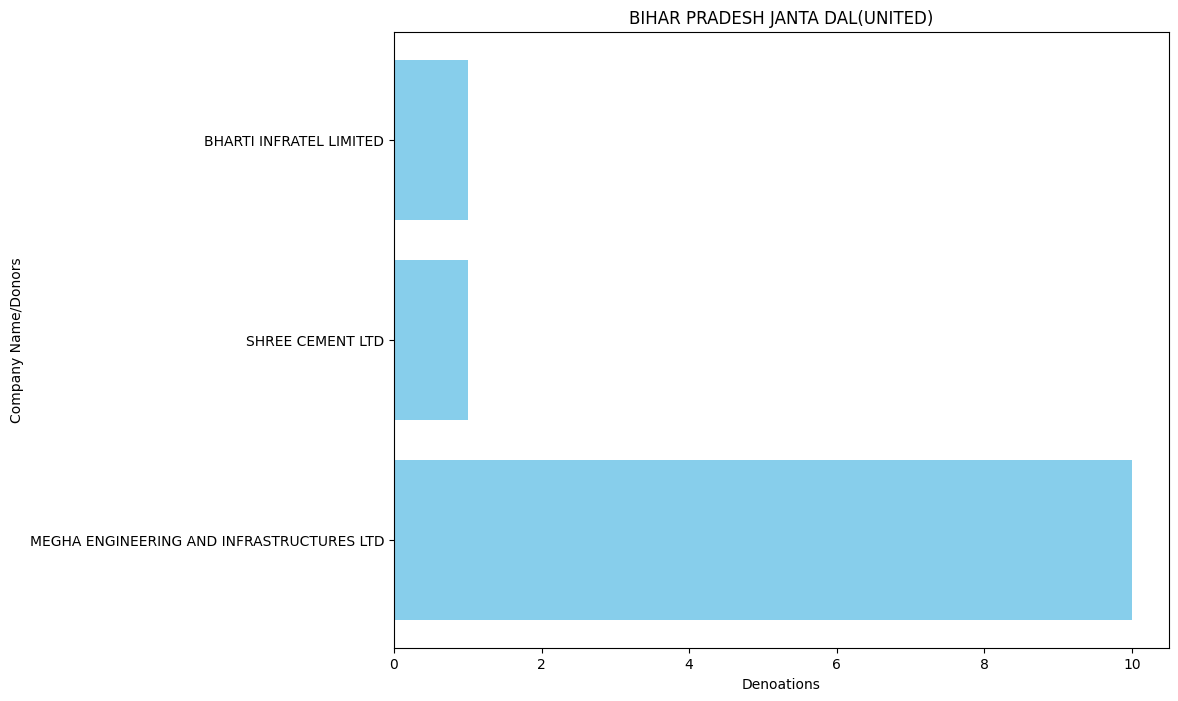

In [227]:
parties = list(BPJD_Comapny_Total.keys())
denoation = list(BPJD_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('BIHAR PRADESH JANTA DAL(UNITED)')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [174]:
JKNC_Comapny_Total

{'BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO': 0.5}

In [175]:
RJD_Comapny_Total

{'QUALITY MAINTENANCE VENTURE LTD': 0.5,
 'BHARTI AIRTEL LIMITEDAIRTEL CURRE NT AC-GCO': 0.1,
 'M/SGAURAV INTERNATIONAL': 0.1,
 'RICHA & CO': 0.5,
 'SARITA HANDA EXPORTS PVT LTD': 0.3,
 'SHREE CEMENT LTD': 1.0,
 'CASTLE LIQUORS PRIVATE LIMITED': 0.7,
 'IFB AGRO INDUSTRIES LIMITED': 35.0,
 'M S VARAS INTERNATIONAL PVT LTD': 0.5,
 'ASKUS LOGISTICS PRIVATE LIMITED': 9.0,
 'PURULIA BOTTLING PVT LTD': 2.5,
 'LAXMI INDUSTRIAL BOTTLING PLANT': 2.44,
 'PRAKASH DISTILLERY & CHEMICAL CO (P) LT D': 0.8,
 'VIKAS PARASRAMPURIA': 1.5,
 'HERALD BEVERAGES PRIVATE LIMITED': 2.0,
 'MAHABIR BANKA': 1.5,
 'RAUNAK GUPTA': 3.5,
 'SANDEEP AUTO LINES': 2.0,
 'WESTWELL GASES PRIVATE LIMITED': 5.1,
 'NORTHERN SPIRITS LTD': 1.2,
 'RAHUL CHOUDHARY': 0.04,
 'SENGUPTA AND SENGUPTA PVT LTD': 1.0,
 'DYNAMIC CS BOTTLING PVT LTD': 0.22,
 'MONALISA BOTTLING INDUSTRIES PVT LTD': 1.0}

In [176]:
DMK_Comapny_Total

{'MODERN ROAD MAKERS PVT LTD': 2.0,
 'FUTURE GAMING AND HOTEL SERVICES PR': 453.0,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 60.0,
 'KAL RADIO LIMITED': 3.5,
 'SOUTH ASIA FM LIMITED': 3.5,
 'SUN DISTRIBUTION SERVICES PVT LTD': 3.0,
 'THE INDIA CEMENTS LTD': 4.0,
 'THRIVENI EARTH MOVERS PVT LTD': 3.0,
 'FUTURE GAMING AND HOTEL SERVICES PRIVATE LIMITED': 50.0,
 'MEGHA ENGINEERING & INFRASTRUCTURES LIMITED': 25.0,
 'FERTILELAND FOODS PRIVATE LIMITED': 5.0,
 'SANDEEP AUTO LINES': 1.0,
 'ASKUS LOGISTICS PVT LTD': 7.0,
 'HERALD BEVERAGES PRIVATE LIMITED': 4.0,
 'WESTWELL GASES PRIVATE LIMITED': 8.0}

In [177]:
SAD_Comapny_Total

{'VARDHMAN TEXTILES LTD': 0.75,
 'BHARTI INFRATEL LIMITED': 1.0,
 'FASTWAY TRANSMISSIONS PVT LTD': 5.0,
 'SANDEEP KHANNA AND ASSOCIATES': 0.004,
 'VIKAS KUMAR GARG': 0.003,
 'GOURAV KUMAR': 0.003,
 'KEVENTER FOODPARK INFRA LIMITED': 0.5}

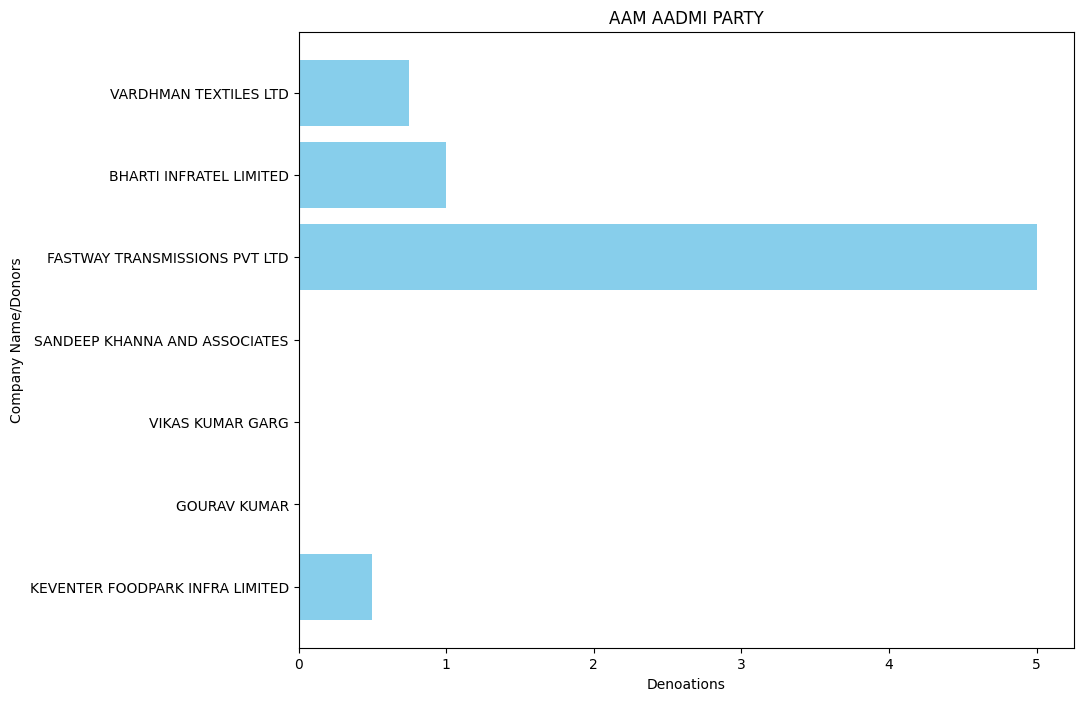

In [230]:
parties = list(SAD_Comapny_Total.keys())
denoation = list(SAD_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('AAM AADMI PARTY')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [178]:
SS_Comapny_Total

{'PREMCHAND GODHA': 0.07,
 'PRL DEVELOPERS PRIVATE LIMITED': 5.0,
 'KEYSTONE REALTORS PVT LTD': 1.3,
 'CH UDAYA SANKAR': 0.02,
 'CV SRINIVASA': 0.02,
 'K RAHEJA CORP PVT LTD': 1.0,
 'R SURYA NARAYNARAJU': 0.02,
 'SULA VINEYARDS PVT LTD': 0.25,
 'T SIRISH BABU': 0.02,
 'VAMONA DEVELOPERS PRIVATE LIMITED': 0.25,
 'SITARA DIAMOND PRIVATE LIMITED': 0.5,
 'ALLANA COLD STORAGE': 1.0,
 'ALLANASONS PRIVATE L': 2.0,
 'FRIGORIFICO ALLANA P': 2.0,
 'TORRENT POWER LIMITED': 3.0,
 'CENTURY TEXTILES AND INDUSTRIES LTD': 1.0,
 'ULTRA TECH CEMENT LIMITED': 3.0,
 'JINDAL POLY FILMS LIMITED': 0.5,
 'GENEXT HARDWARE PARKS PVT. LTD': 3.0,
 'MAHALAXMI VIDYUT PVT.LTD.': 2.5,
 'QWIKSUPPLYCHAINPRIVATELIMITED': 25.0,
 'BIRLAESTATESPRIVATELIMITED': 2.0,
 'PRARAMBH SECURITIES PVT LTDPROPRIET': 2.0,
 'RANJIT BUILDCON LIMITED': 2.0,
 'RANJIT PROJECTS PRIVATE LIMITED': 1.0,
 'RANJIT TOLL ROAD PRIVATE LIMITED': 2.0,
 'B G SHIRKE CONSTRUCTION TECHNOLOGY PVT L TD': 85.0,
 'DINESHCHANDRA R AGRAWAL INFRACON PVT LTD': 3.

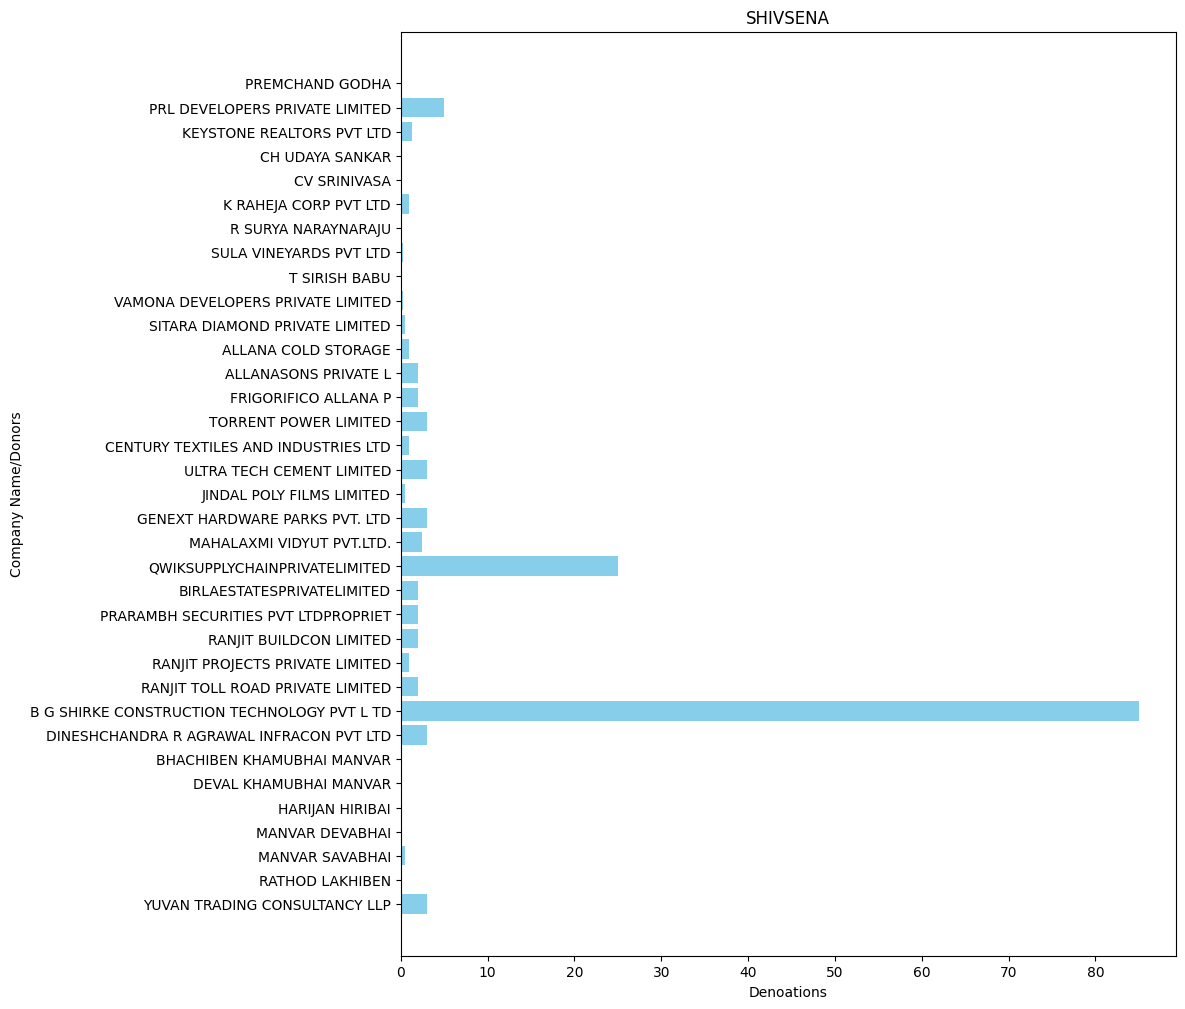

In [250]:
parties = list(SS_Comapny_Total.keys())
denoation = list(SS_Comapny_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 12))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donors')
plt.title('SHIVSENA')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [179]:
Congress_Comapny_Total

{'PONUGOTI HEMENDAR RAO': 0.03,
 'KOTESWAR RAO GULLAPALLY': 0.05,
 'MANDADI RAMULU': 0.04,
 'PAPPI REDDY': 0.05,
 'PEDDIREDDY RAMANJANEYA REDDY': 0.05,
 'PREMCHAND GODHA': 0.05,
 'PRL DEVELOPERS PRIVATE LIMITED': 5.0,
 'RAVINDER AGARWAL': 0.08,
 'SANGIREDDY THIRUPATHI REDDY': 0.05,
 'SWAPNA CHENNAVARAM': 0.05,
 'VINAY AGARWAL': 0.12,
 'IDEAL REAL ESTATES PRIVATE LIMITED': 1.0,
 'JUBILANT LIFE SCIENCES LIMITED': 1.0,
 'KEVENTER FOODPARK INFRA LIMITED': 20.0,
 'KEYSTONE REALTORS PVT LTD': 0.6,
 'MODERN ROAD MAKERS PVT LTD': 6.0,
 'OMKAR REALTORS PROJECTS PVT LTD': 1.5,
 'P SHIVA SHANKAR REDDY': 0.04,
 'POLINA GANESWARARAO': 0.04,
 'SK INFRA': 0.04,
 'SREE KRUTHI': 0.08,
 'THE SUPREME INDUSTRIES LTD': 1.25,
 'ANJANI ROADLINES': 0.5,
 'APOLLO TYRES LIMITED': 3.0,
 'BHARTI INFRATEL LIMITED': 8.0,
 'CHHATTISGARH DISTILLERIES LIMITED': 2.0,
 'FINOLEX CABLES LTD': 2.0,
 'UTKAL ALUMINA INTERNATIONAL LIMITED': 0.1,
 'VM SALGAOCAR CORPORATION PVT LTD': 0.1,
 'WELSPUN ENTERPRISES LTD': 3.0,
 'DERI

In [180]:
AITC_Comapny_Total

{'ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED': 0.25,
 'INNOCENT MERCHANDISE PVT LTD': 0.25,
 'MERLIN RECREATION PVT LTD': 0.25,
 'AMBUJA REALTY EVENTS MANAGMENT LTD': 1.0,
 'HITECH SYSTEMS & SERVICES LTD': 1.0,
 'KEVENTER FOODPARK INFRA LIMITED': 20.0,
 'PHILIPS CARBON BLACK LTD': 5.0,
 'ITC LIMITED': 4.9546,
 'BAGDOGRA REALTORS PVT LTD': 1.0,
 'OM CREDIT PVT LTD': 3.0,
 'ALMIGHTY FINANCE AND INVESTMENT P': 0.3,
 'G M HOLDINGS PVT LTD': 0.4,
 'OM METALS DEVELOPERS (P) LTD.': 5.5,
 'SUNSHINE FINTRADE PVT LTD': 0.4,
 'FAIRPLAN VINTRADE PRIVATE LIMITED': 0.7,
 'CHAKRADHARI TRADELINK PRIVATE LIMIT': 0.3,
 'CHITRAKUT HOLDINGS LTD': 1.0,
 'DAFFODIL GOODS PRIVATE LIMITED': 0.2,
 'LILAC MERCHANDISE PRIVATE LIMITED': 0.2,
 'MAHAVIRA VINCOM PRIVATE LIMITED': 0.3,
 'AVEES TRADING & FINANCE PVT LTD': 24.0,
 'NIRMALDEEP RESOURCES LTD': 0.4,
 'CONFIDENT FINANCIAL CONSULTANCY PRI': 0.25,
 'PERFECT INVESTMENT CONSULTANCY PRIV': 0.18,
 'SIDHANT INVESTMENT ADVISORY PRIVATE': 0.25,
 'SKP MERCHANTS LL

In [181]:
BJP_Comapny_Total

{'A B C INDIA LIMITED': 0.4,
 'ARIHANT ENTERPRISES': 0.4,
 'CHOUDHARY GARMENTS': 0.2,
 'ESSEL MINING AND INDS LTD': 50.0,
 'GRASIM INDUSTRIES LTD': 23.0,
 'HIGHSTREET CRUISES AND ENTERTAINMENT PVT LTD': 0.3,
 'KAMLANG SAW & VENEER MILLS PVT LTD': 0.2,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 519.0,
 'MSPL LTD': 1.0,
 'MYRIAD DEVELOPERS': 0.15,
 'OMKAR VENTURES PVT LTD': 4.0,
 'PATEL HIGHWAY MANAGEMENT PVT LTD': 1.0,
 'PHL FINIVEST PVT LTD': 40.0,
 'PIRAMAL CAPITAL AND HOUSING FINANCE LTD': 10.0,
 'PIRAMAL ENTERPRISES LTD': 10.0,
 'RENUKA INVESTMENTS AND FINANCE LTD': 5.0,
 'RENUKESHWAR INVESTMENTS PVT LTD': 5.0,
 'SHIVAM TRANSCON PRIVATE LIMITED': 0.5,
 'SKYWORLD DEVELOPERS LLP': 0.15,
 'TEXPORT CREATION': 0.9,
 'ALOK NARAYAN PANDEY': 3.4,
 'BELLWEY INTERNATIONAL CO': 1.0,
 'CHHATTISGARH DISTILLERIES LIMITED': 1.0,
 'DEMPO INDUSTRIES PVT LTD': 0.05,
 'GUJARAT FLUORO CHEMICALS LIMITED': 10.0,
 'MOHINDER': 0.25,
 'MR RAJ DEEPAK VARSHNEY': 0.05,
 'MS PEARL GLOBAL INDUSTRIES LTD 

In [184]:
def date_time_split(datasets):
    years = [2019 , 2020, 2021, 2022, 2023, 2024]
    Party_Year = [2019 , 2020, 2021, 2022, 2023, 2024]
    Company_Year = [2019 , 2020, 2021, 2022, 2023, 2024]
    datasets['Date']= datasets["Date of\nPurchase"].astype(str)
    datasets['Day']=datasets['Date'].str.split('-').str[0]
    datasets['Months']=datasets['Date'].str.split('-').str[1]
    datasets['Year']= datasets['Date'].str.split('-').str[2]
    datasets['Months']=datasets['Months'].astype(int)
    datasets['Year']=datasets['Year'].astype(int)
    datasets['Day']=datasets['Day'].astype(int)
    Counter = 0
    for i in years:
        print(i)
        temp = datasets[(datasets["Year"] == i)]
        Party_Year[Counter] = pd.DataFrame(temp)
        # print(company_name1[counter])
        Counter = Counter + 1
    return Party_Year

In [185]:
BJP_Company_Yearly = date_time_split(Marged_Datasets[0])
AITC_Company_Yearly = date_time_split(Marged_Datasets[1])
Congress_Company_Yearly = date_time_split(Marged_Datasets[2])
BRS_Company_Yearly = date_time_split(Marged_Datasets[14])

2019
2020
2021
2022
2023
2024
2019
2020
2021
2022
2023
2024
2019
2020
2021
2022
2023
2024
2019
2020
2021
2022
2023
2024


In [186]:
BJP_Company_Yearly[1]

,Unnamed: 0,Date of\nPurchase,Name of the Purchaser,Bond\nNumber,Denominations,Name of the Political Party,Date,Day,Months,Year
3103,3103,14-01-2020,RAJU KUMAR SHARMA,821,10000000,BHARATIYA JANATA PARTY,14-01-2020,14,1,2020
3104,3104,14-01-2020,RAJU KUMAR SHARMA,827,10000000,BHARATIYA JANATA PARTY,14-01-2020,14,1,2020
3105,3105,14-01-2020,RAJU KUMAR SHARMA,814,10000000,BHARATIYA JANATA PARTY,14-01-2020,14,1,2020
3106,3106,14-01-2020,RAJU KUMAR SHARMA,806,10000000,BHARATIYA JANATA PARTY,14-01-2020,14,1,2020
3107,3107,14-01-2020,RAJU KUMAR SHARMA,830,10000000,BHARATIYA JANATA PARTY,14-01-2020,14,1,2020
...,...,...,...,...,...,...,...,...,...,...
3557,3557,28-10-2020,INDIA GLYCOLS LTD,3232,100000,BHARATIYA JANATA PARTY,28-10-2020,28,10,2020
3558,3558,28-10-2020,INDIA GLYCOLS LTD,3234,100000,BHARATIYA JANATA PARTY,28-10-2020,28,10,2020
3559,3559,28-10-2020,INDIA GLYCOLS LTD,3240,100000,BHARATIYA JANATA PARTY,28-10-2020,28,10,2020
3560,3560,28-10-2020,INDIA GLYCOLS LTD,3230,100000,BHARATIYA JANATA PARTY,28-10-2020,28,10,2020


In [187]:
BJP_Company_2019, _, _, _, = Company_Counter1(BJP_Company_Yearly[0])

In [188]:
BJP_Company_2020, _, _, _, = Company_Counter1(BJP_Company_Yearly[1])

In [189]:
BJP_Company_2021, _, _, _, = Company_Counter1(BJP_Company_Yearly[2])

In [190]:
BJP_Company_2022, _, _, _, = Company_Counter1(BJP_Company_Yearly[3])

In [191]:
BJP_Company_2023, _, _, _, = Company_Counter1(BJP_Company_Yearly[4])

In [192]:
BJP_Company_2024, _, _, _, = Company_Counter1(BJP_Company_Yearly[5])

In [193]:
AITC_Company_2019, _, _, _, = Company_Counter1(AITC_Company_Yearly[0])

In [194]:
AITC_Company_2020, _, _, _, = Company_Counter1(AITC_Company_Yearly[1])

In [195]:
AITC_Company_2021, _, _, _, = Company_Counter1(AITC_Company_Yearly[2])

In [196]:
AITC_Company_2022, _, _, _, = Company_Counter1(AITC_Company_Yearly[3])

In [197]:
AITC_Company_2023, _, _, _, = Company_Counter1(AITC_Company_Yearly[4])

In [198]:
AITC_Company_2024, _, _, _, = Company_Counter1(AITC_Company_Yearly[5])

In [199]:
Congress_Company_2019 , _, _, _, = Company_Counter1(Congress_Company_Yearly[0])

In [200]:
Congress_Company_2020 , _, _, _, = Company_Counter1(Congress_Company_Yearly[1])

In [201]:
Congress_Company_2021 , _, _, _, = Company_Counter1(Congress_Company_Yearly[2])

In [202]:
Congress_Company_2022 , _, _, _, = Company_Counter1(Congress_Company_Yearly[3])

In [203]:
Congress_Company_2023 , _, _, _, = Company_Counter1(Congress_Company_Yearly[4])

In [204]:
Congress_Company_2024 , _, _, _, = Company_Counter1(Congress_Company_Yearly[5])

In [205]:
BRS_Company_2019 , _, _, _,= Company_Counter1(BRS_Company_Yearly[0])

In [206]:
BRS_Company_2020 , _, _, _,= Company_Counter1(BRS_Company_Yearly[1])

In [207]:
BRS_Company_2021 , _, _, _,= Company_Counter1(BRS_Company_Yearly[2])

In [208]:
BRS_Company_2022, _, _, _,= Company_Counter1(BRS_Company_Yearly[3])

In [209]:
BRS_Company_2023 , _, _, _,= Company_Counter1(BRS_Company_Yearly[4])

In [210]:
BRS_Company_2024 , _, _, _,= Company_Counter1(BRS_Company_Yearly[5])

In [343]:
BRS_Company_2024

{'NATCO PHARMA LTD': 3.0}

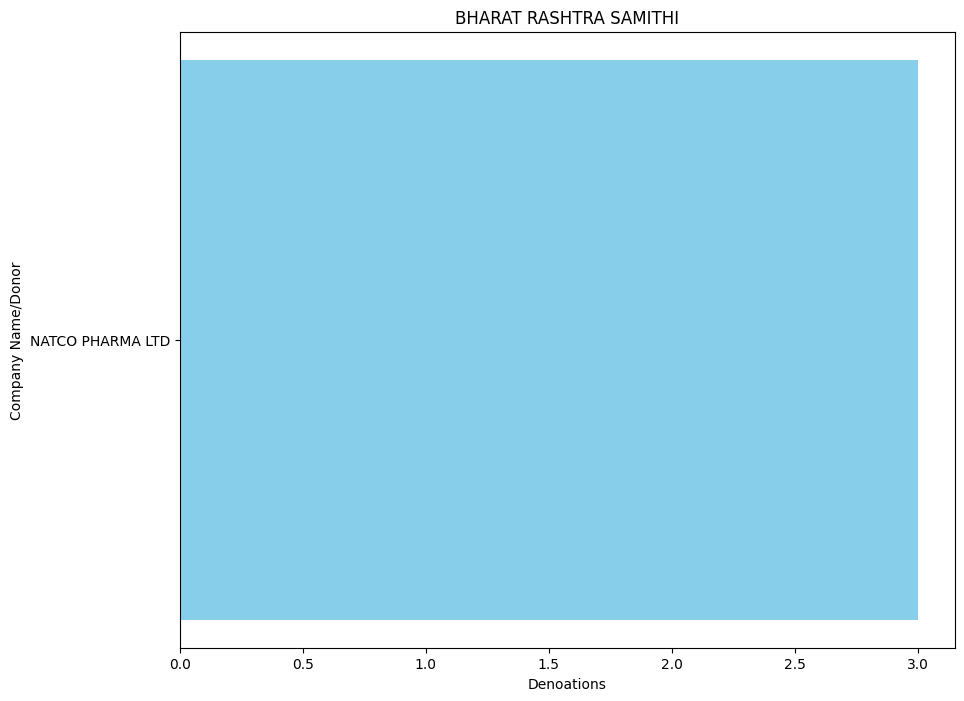

In [342]:
parties = list(BRS_Company_2024.keys())
denoation = list(BRS_Company_2024.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Company Name/Donor')
plt.title('BHARAT RASHTRA SAMITHI')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

### Floting Graphs

In [215]:
import matplotlib.pyplot as plt

In [ ]:
# del Marged_Total[10000000]
# del Marged_Total[1000000]
Marged_Total

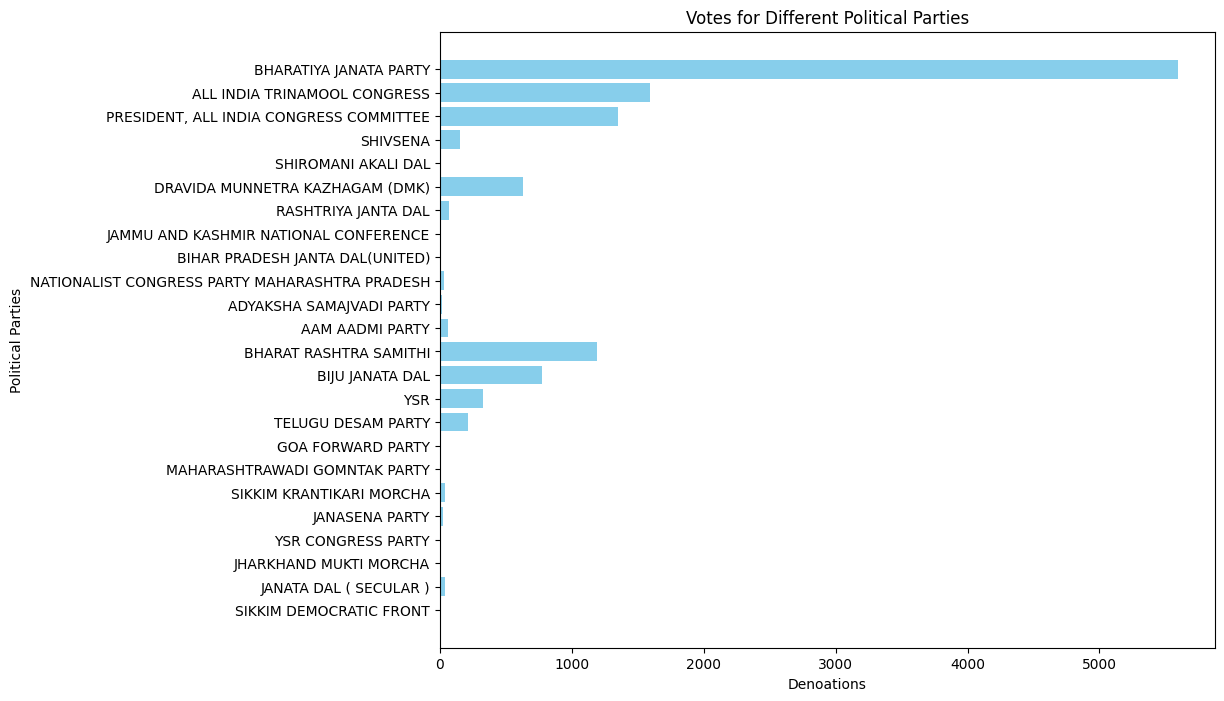

In [216]:
parties = list(Marged_Total.keys())
denoation = list(Marged_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Votes for Different Political Parties')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:
parties = list(Party_2019_Total.keys())
denoation = list(Party_2019_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2019')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:
parties = list(Party_2020_Total.keys())
denoation = list(Party_2020_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2020')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:
parties = list(Party_2021_Total.keys())
denoation = list(Party_2021_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2021')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:
parties = list(Party_2022_Total.keys())
denoation = list(Party_2022_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2022')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:
parties = list(Party_2023_Total.keys())
denoation = list(Party_2023_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2023')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:
parties = list(Party_2024_Total.keys())
denoation = list(Party_2024_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2024')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:
Party_Total_Fund

In [214]:
parties = list(Party_Total_Fund.keys())
denoation = list(Party_Total_Fund.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2024')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

NameError: name 'plt' is not defined

In [ ]:
Party_20

In [ ]:
parties = list(Party_2024_Total.keys())
denoation = list(Party_2024_Total.values())

# Plotting the chart
plt.figure(figsize=(10, 8))
plt.barh(parties, denoation, color='skyblue')
plt.xlabel('Denoations')
plt.ylabel('Political Parties')
plt.title('Year 2024')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest value at the top
plt.show()

In [ ]:

import numpy as np 
import matplotlib.pyplot as plt 


# set width of bar 
barWidth = 0.20
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
parties = list(Party_2019_Total.keys())
denoation = list(Party_2019_Total.values())
denoation1 = list(Party_2020_Total.values())
denoation2 = list(Party_2021_Total.values())
 
# Set position of bar on X axis 
br1 = np.arange(len(parties)) 
br2 = [x + barWidth for x in br1] 
br3 = [x + barWidth for x in br2] 
 
# Make the plot
plt.barh(br1, denoation, color ='r', 
        edgecolor ='grey', label ='2019') 
plt.barh(br2, denoation1, color ='g', label ='2020') 
# plt.barh(br3, denoation2, color ='b', 
        # edgecolor ='grey', label ='2021') 
 
# Adding Xticks 
plt.xlabel('Denoations', fontweight ='bold', fontsize = 15) 
plt.ylabel('Political Parties', fontweight ='bold', fontsize = 15) 

# plt.xticks([r + barWidth for r in range(len(IT))], 
#         ['2015', '2016', '2017', '2018', '2019'])
 
plt.legend()
plt.show() 

In [ ]:
df = pandas.DataFrame(dict(graph=['Item one', 'Item two', 'Item three'],
                           n=[3, 5, 2], m=[6, 1, 3])) 

ind = np.arange(len(df))
width = 0.4

fig, ax = plt.subplots()
ax.barh(ind, df.n, width, color='red', label='N')
ax.barh(ind + width, df.m, width, color='green', label='M')

ax.set(yticks=ind + width, yticklabels=df.graph, ylim=[2*width - 1, len(df)])
ax.legend()

plt.show()

In [ ]:
Party_2019_Total

In [ ]:
Party_2020_Total

In [ ]:

# First dataset
data1 = {
    'ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM': 6.05,
    'BHARAT RASHTRA SAMITHI': 37.1529,
    'BHARATIYA JANATA PARTY': 1971.7501,
    'PRESIDENT, ALL INDIA CONGRESS COMMITTEE': 170.311,
    'SHIVSENA': 33.38,
    'TELUGU DESAM PARTY': 7.3,
    'YSR': 8.25,
    'DRAVIDA MUNNETRA KAZHAGAM (DMK)': 9.0,
    'JANATA DAL ( SECULAR )': 2.5,
    'NATIONALIST CONGRESS PARTY MAHARASHTRA PRADESH': 15.5,
    'ALL INDIA TRINAMOOL CONGRESS': 87.0946,
    'BIHAR PRADESH JANTA DAL(UNITED)': 3.0,
    'RASHTRIYA JANTA DAL': 2.5,
    'AAM AADMI PARTY': 2.2,
    'ADYAKSHA SAMAJVADI PARTY': 10.84,
    'SHIROMANI AKALI DAL': 6.76,
    'JHARKHAND MUKTI MORCHA': 1.0,
    'JAMMU AND KASHMIR NATIONAL CONFERENCE': 0.5,
    'BIJU JANATA DAL': 10.0
}

# Second dataset
data2 = {
    'BIJU JANATA DAL': 77.0,
    'BHARATIYA JANATA PARTY': 73.89,
    'AAM AADMI PARTY': 3.3,
    'ALL INDIA TRINAMOOL CONGRESS': 29.77,
    'PRESIDENT, ALL INDIA CONGRESS COMMITTEE': 9.0,
    'DRAVIDA MUNNETRA KAZHAGAM (DMK)': 80.0,
    'RASHTRIYA JANTA DAL': 1.0,
    'BIHAR PRADESH JANTA DAL(UNITED)': 1.0,
    'YSR': 89.0
}

# Extracting party names and values for each dataset
parties1 = list(data1.keys())
values1 = list(data1.values())

parties2 = list(data2.keys())
values2 = list(data2.values())

# Setting up positions for bars
x = range(len(parties1))
x2 = [i + 0.4 for i in x]

# Plotting
plt.figure(figsize=(12, 6))
plt.bar(x, values1, width=0.4, color='b', align='center', label='Dataset 1')
plt.bar(x2, values2, width=0.4, color='r', align='center', label='Dataset 2')
plt.xlabel('Parties')
plt.ylabel('Values')
plt.title('Comparison of Values between Datasets')
plt.xticks([i + 0.2 for i in x], parties1, rotation=90)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
df = pd.DataFrame(columns=['Date of\nPurchase','Name of the Purchaser'])

In [ ]:
new_row = {
    'Date of\nPurchase':14-2-2004,
    'Name of Purchaser':"saafawsefef"
}

In [ ]:
df._append(new_row , ignore_index=True)

In [211]:
Comany_Fund_Total

{'A B C INDIA LIMITED': 4000000,
 'ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED': 2500000,
 'ARIHANT ENTERPRISES': 4000000,
 'CHOUDHARY GARMENTS': 2000000,
 'ESSEL MINING AND INDS LTD': 2245000000,
 'GRASIM INDUSTRIES LTD': 330000000,
 'HIGHSTREET CRUISES AND ENTERTAINMENT PVT LTD': 3000000,
 'INNOCENT MERCHANDISE PVT LTD': 2500000,
 'KAMLANG SAW & VENEER MILLS PVT LTD': 2000000,
 'MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED': 8210000000,
 'MERLIN RECREATION PVT LTD': 2500000,
 'MSPL LTD': 40000000,
 'MYRIAD DEVELOPERS': 1500000,
 'OMKAR VENTURES PVT LTD': 40000000,
 'PATEL HIGHWAY MANAGEMENT PVT LTD': 10000000,
 'PHL FINIVEST PVT LTD': 400000000,
 'PIRAMAL CAPITAL AND HOUSING FINANCE LTD': 100000000,
 'PIRAMAL ENTERPRISES LTD': 100000000,
 'PONUGOTI HEMENDAR RAO': 300000,
 'RENUKA INVESTMENTS AND FINANCE LTD': 50000000,
 'RENUKESHWAR INVESTMENTS PVT LTD': 50000000,
 'SHIVAM TRANSCON PRIVATE LIMITED': 5000000,
 'SKYWORLD DEVELOPERS LLP': 1500000,
 'TEXPORT CREATION': 9000000,
 'AL

In [213]:
for keys , values in Comany_Fund_Total.items():
    print(keys,":-" , values)

A B C INDIA LIMITED :- 4000000
ACROPOLIS MAINTENANCE SERVICES PRIVATE LIMITED :- 2500000
ARIHANT ENTERPRISES :- 4000000
CHOUDHARY GARMENTS :- 2000000
ESSEL MINING AND INDS LTD :- 2245000000
GRASIM INDUSTRIES LTD :- 330000000
HIGHSTREET CRUISES AND ENTERTAINMENT PVT LTD :- 3000000
INNOCENT MERCHANDISE PVT LTD :- 2500000
KAMLANG SAW & VENEER MILLS PVT LTD :- 2000000
MEGHA ENGINEERING AND INFRASTRUCTURES LI MITED :- 8210000000
MERLIN RECREATION PVT LTD :- 2500000
MSPL LTD :- 40000000
MYRIAD DEVELOPERS :- 1500000
OMKAR VENTURES PVT LTD :- 40000000
PATEL HIGHWAY MANAGEMENT PVT LTD :- 10000000
PHL FINIVEST PVT LTD :- 400000000
PIRAMAL CAPITAL AND HOUSING FINANCE LTD :- 100000000
PIRAMAL ENTERPRISES LTD :- 100000000
PONUGOTI HEMENDAR RAO :- 300000
RENUKA INVESTMENTS AND FINANCE LTD :- 50000000
RENUKESHWAR INVESTMENTS PVT LTD :- 50000000
SHIVAM TRANSCON PRIVATE LIMITED :- 5000000
SKYWORLD DEVELOPERS LLP :- 1500000
TEXPORT CREATION :- 9000000
ALOK NARAYAN PANDEY :- 34000000
BELLWEY INTERNATIONA